In [1]:
from os import listdir
from os.path import isfile, join

from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras import applications
from keras.utils.np_utils import to_categorical
from keras.models import load_model

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import cv2
import pickle

Using TensorFlow backend.


In [2]:
applebees_list_image_names = [f for f in listdir('restaurant_images/applebeespics/') if isfile(join('restaurant_images/applebeespics/', f))]
burgerking_list_image_names = [f for f in listdir('restaurant_images/burgerkingpics/') if isfile(join('restaurant_images/burgerkingpics/', f))]
chilis_list_image_names = [f for f in listdir('restaurant_images/chilispics/') if isfile(join('restaurant_images/chilispics/', f))]
chipotle_list_image_names = [f for f in listdir('restaurant_images/chipotlepics/') if isfile(join('restaurant_images/chipotlepics/', f))]
dennys_list_image_names = [f for f in listdir('restaurant_images/dennyspics/') if isfile(join('restaurant_images/dennyspics/', f))]
dominos_list_image_names = [f for f in listdir('restaurant_images/dominospics/') if isfile(join('restaurant_images/dominospics/', f))]
innout_list_image_names = [f for f in listdir('restaurant_images/innoutpics/') if isfile(join('restaurant_images/innoutpics/', f))]
panerabread_list_image_names = [f for f in listdir('restaurant_images/panerabreadpics/') if isfile(join('restaurant_images/panerabreadpics/', f))]
quiznoes_list_image_names = [f for f in listdir('restaurant_images/quiznoespics/') if isfile(join('restaurant_images/quiznoespics/', f))]
subway_list_image_names = [f for f in listdir('restaurant_images/subwaypics/') if isfile(join('restaurant_images/subwaypics/', f))]
wendys_list_image_names = [f for f in listdir('restaurant_images/wendyspics/') if isfile(join('restaurant_images/wendyspics/', f))]
chickfila_list_image_names = [f for f in listdir('restaurant_images/chickfilapics/') if isfile(join('restaurant_images/chickfilapics/', f))]
dairyqueen_list_image_names = [f for f in listdir('restaurant_images/dairyqueenpics/') if isfile(join('restaurant_images/dairyqueenpics/', f))]
ihop_list_image_names = [f for f in listdir('restaurant_images/ihoppics/') if isfile(join('restaurant_images/ihoppics/', f))]
olivegarden_list_image_names = [f for f in listdir('restaurant_images/olivegardenpics/') if isfile(join('restaurant_images/olivegardenpics/', f))]
outbacksteakhouse_list_image_names = [f for f in listdir('restaurant_images/outbackpics/') if isfile(join('restaurant_images/outbackpics', f))]
tacobell_list_image_names = [f for f in listdir('restaurant_images/tacobellpics/') if isfile(join('restaurant_images/tacobellpics/', f))]


In [3]:
restaurants = {'applebeespics':applebees_list_image_names, 'burgerkingpics':burgerking_list_image_names, 
               'chilispics':chilis_list_image_names, 'chipotlepics':chipotle_list_image_names,
              'dennyspics':dennys_list_image_names, 'dominospics':dominos_list_image_names, 
              'panerabreadpics':panerabread_list_image_names, 'quiznoespics':quiznoes_list_image_names, 
               'subwaypics':subway_list_image_names, 'wendyspics':wendys_list_image_names,
              'chickfilapics':chickfila_list_image_names, 'dairyqueenpics':dairyqueen_list_image_names,
              'ihoppics':ihop_list_image_names, 'olivegardenpics':olivegarden_list_image_names,
              'outbackpics':outbacksteakhouse_list_image_names,
              'tacobellpics':tacobell_list_image_names}

In [4]:
model_practice = load_model('60epochs_calorie_classifying_model.h5')

In [ ]:
model_practice.summary()

In [5]:
model_practice.layers.pop()
model_practice.layers.pop()
model_practice.layers.pop()

In [6]:
model_practice.outputs = [model_practice.layers[-1].output]
model_practice.layers[-1].outbound_nodes = []

In [ ]:
model_practice.summary()

In [ ]:
for image_name in list_image_names:
    print (image_name)

In [7]:
names_and_pics = {}

for restaurant, list_image_names in restaurants.items():

    for image_name in list_image_names:
    
        if '.jpg' in image_name:
            file_path = 'restaurant_images/'+restaurant+'/'+image_name
        else:
            continue
        
        print (restaurant, image_name)
        img = load_img(file_path, target_size=(224, 224))
        print (restaurant, image_name)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0
    
        out = model_practice.predict(x)
        names_and_pics[image_name] = out[0].tolist()

applebeespics applebees_530_1_Crunchy Onion Rings.jpg
applebeespics applebees_530_1_Crunchy Onion Rings.jpg
applebeespics applebees_170_2_Mango Lemonade.jpg
applebeespics applebees_170_2_Mango Lemonade.jpg
applebeespics applebees_720_3_Butcher's Meat & Potatoes.jpg
applebeespics applebees_720_3_Butcher's Meat & Potatoes.jpg
applebeespics applebees_370_1_Thai Shrimp Salad (add dressing choice).jpg
applebeespics applebees_370_1_Thai Shrimp Salad (add dressing choice).jpg
applebeespics applebees_990_3_Triple Hog Dare Ya.jpg
applebeespics applebees_990_3_Triple Hog Dare Ya.jpg
applebeespics applebees_430_1_Kids Sundae with Chocolate Syrup.jpg
applebeespics applebees_430_1_Kids Sundae with Chocolate Syrup.jpg
applebeespics applebees_200_3_Wings, add Classic Buffalo Sauce.jpg
applebeespics applebees_200_3_Wings, add Classic Buffalo Sauce.jpg
applebeespics applebees_100_1_Tropicana Pink Lemonade.jpg
applebeespics applebees_100_1_Tropicana Pink Lemonade.jpg
applebeespics applebees_690_3_Chocol

applebeespics applebees_5_2_Brewed Iced Tea.jpg
applebeespics applebees_5_2_Brewed Iced Tea.jpg
applebeespics applebees_100_2_Mug Root Beer.jpg
applebeespics applebees_100_2_Mug Root Beer.jpg
applebeespics applebees_130_1_Kids Garlic Mashed Potatoes.jpg
applebeespics applebees_130_1_Kids Garlic Mashed Potatoes.jpg
applebeespics applebees_190_2_Kids Chicken Griller.jpg
applebeespics applebees_190_2_Kids Chicken Griller.jpg
applebeespics applebees_1520_2_Hand-Battered Fish & Chips.jpg
applebeespics applebees_1520_2_Hand-Battered Fish & Chips.jpg
applebeespics applebees_120_3_Classic Combo, add Sweet Asian Chile Sauce.jpg
applebeespics applebees_120_3_Classic Combo, add Sweet Asian Chile Sauce.jpg
applebeespics applebees_1140_2_Fiesta Lime Chicken.jpg
applebeespics applebees_1140_2_Fiesta Lime Chicken.jpg
applebeespics applebees_190_3_Tomato Basil Soup.jpg
applebeespics applebees_190_3_Tomato Basil Soup.jpg
applebeespics applebees_150_1_Kids Milk, 1%, Chocolate.jpg
applebeespics applebees

applebeespics applebees_180_3_Lunch Thai Shrimp Salad.jpg
applebeespics applebees_180_3_Lunch Thai Shrimp Salad.jpg
applebeespics applebees_530_2_Salted Caramel Shorty Shake.jpg
applebeespics applebees_530_2_Salted Caramel Shorty Shake.jpg
applebeespics applebees_1290_3_Oriental Grilled Chicken Salad (add dressing choice).jpg
applebeespics applebees_1290_3_Oriental Grilled Chicken Salad (add dressing choice).jpg
applebeespics applebees_100_1_Tropicana Lemonade.jpg
applebeespics applebees_100_1_Tropicana Lemonade.jpg
applebeespics applebees_0_2_Caffeine Free Diet Pepsi.jpg
applebeespics applebees_0_2_Caffeine Free Diet Pepsi.jpg
applebeespics applebees_640_3_Lunch 4-Cheese Mac & Cheese with Honey Pepper Chicken Tenders.jpg
applebeespics applebees_640_3_Lunch 4-Cheese Mac & Cheese with Honey Pepper Chicken Tenders.jpg
applebeespics applebees_160_1_Strawberry Limeade.jpg
applebeespics applebees_160_1_Strawberry Limeade.jpg
applebeespics applebees_960_2_Build Your Sampler, Spinach & Artich

applebeespics applebees_540_3_Cedar Salmon with Maple Mustard Glaze.jpg
applebeespics applebees_540_3_Cedar Salmon with Maple Mustard Glaze.jpg
applebeespics applebees_1010_3_The American Standard Burger.jpg
applebeespics applebees_1010_3_The American Standard Burger.jpg
applebeespics applebees_0_1_IBC Diet Root Beer.jpg
applebeespics applebees_0_1_IBC Diet Root Beer.jpg
applebeespics applebees_250_2_Oriental Dressing.jpg
applebeespics applebees_250_2_Oriental Dressing.jpg
applebeespics applebees_500_3_Build Your Sampler, Chips & Salsa.jpg
applebeespics applebees_500_3_Build Your Sampler, Chips & Salsa.jpg
applebeespics applebees_240_3_Classic Combo, add Bleu Cheese Dressing.jpg
applebeespics applebees_240_3_Classic Combo, add Bleu Cheese Dressing.jpg
applebeespics applebees_130_3_Kids Garlic Mashed Potatoes.jpg
applebeespics applebees_130_3_Kids Garlic Mashed Potatoes.jpg
applebeespics applebees_370_2_Lunch French Onion Soup.jpg
applebeespics applebees_370_2_Lunch French Onion Soup.jp

applebeespics applebees_690_3_Sriracha Shrimp.jpg
applebeespics applebees_690_3_Sriracha Shrimp.jpg
applebeespics applebees_80_3_Burger, Add Monterey Jack.jpg
applebeespics applebees_80_3_Burger, Add Monterey Jack.jpg
applebeespics applebees_20_2_Italian Dressing, Fat Free.jpg
applebeespics applebees_20_2_Italian Dressing, Fat Free.jpg
applebeespics applebees_550_3_Green Goddess Wedge Salad.jpg
applebeespics applebees_550_3_Green Goddess Wedge Salad.jpg
applebeespics applebees_170_1_Strawberry Quencher Lemonade.jpg
applebeespics applebees_170_1_Strawberry Quencher Lemonade.jpg
applebeespics applebees_990_2_Cheeseburger Eggrolls.jpg
applebeespics applebees_990_2_Cheeseburger Eggrolls.jpg
applebeespics applebees_190_1_Green Goddess Dressing.jpg
applebeespics applebees_190_1_Green Goddess Dressing.jpg
applebeespics applebees_340_3_Chili.jpg
applebeespics applebees_340_3_Chili.jpg
applebeespics applebees_80_2_Brisk Raspberry Iced Tea.jpg
applebeespics applebees_80_2_Brisk Raspberry Iced Te

applebeespics applebees_160_1_Peach Quencher Iced Tea.jpg
applebeespics applebees_160_1_Peach Quencher Iced Tea.jpg
applebeespics applebees_200_3_Cherry Limeade.jpg
applebeespics applebees_200_3_Cherry Limeade.jpg
applebeespics applebees_980_3_Triple Chocolate Meltdown.jpg
applebeespics applebees_980_3_Triple Chocolate Meltdown.jpg
applebeespics applebees_110_1_Orange Twister.jpg
applebeespics applebees_110_1_Orange Twister.jpg
applebeespics applebees_90_2_Ginger Ale.jpg
applebeespics applebees_90_2_Ginger Ale.jpg
applebeespics applebees_1440_3_Crispy Chicken & Cornbread Salad (add dressing choice).jpg
applebeespics applebees_1440_3_Crispy Chicken & Cornbread Salad (add dressing choice).jpg
applebeespics applebees_1000_3_Baked Haddock.jpg
applebeespics applebees_1000_3_Baked Haddock.jpg
applebeespics applebees_1170_3_Three-Cheese Chicken Cavatappi.jpg
applebeespics applebees_1170_3_Three-Cheese Chicken Cavatappi.jpg
applebeespics applebees_470_2_Smokin' Double Steak & Egg.jpg
applebees

applebeespics applebees_550_2_Lunch Clubhouse Grille.jpg
applebeespics applebees_550_2_Lunch Clubhouse Grille.jpg
applebeespics applebees_260_1_Garlic Mashed Potatoes.jpg
applebeespics applebees_260_1_Garlic Mashed Potatoes.jpg
applebeespics applebees_610_2_Build Your Sampler, Chicken Quesadilla.jpg
applebeespics applebees_610_2_Build Your Sampler, Chicken Quesadilla.jpg
applebeespics applebees_230_1_Wings, add Honey BBQ Sauce.jpg
applebeespics applebees_230_1_Wings, add Honey BBQ Sauce.jpg
applebeespics applebees_90_2_Steamed Broccoli.jpg
applebeespics applebees_90_2_Steamed Broccoli.jpg
applebeespics applebees_1490_1_Chocolate Chip Cookie Sundae.jpg
applebeespics applebees_1490_1_Chocolate Chip Cookie Sundae.jpg
applebeespics applebees_210_2_Honey French Dressing.jpg
applebeespics applebees_210_2_Honey French Dressing.jpg
applebeespics applebees_690_1_Chocolate Nut Brownie Shorty Shake.jpg
applebeespics applebees_690_1_Chocolate Nut Brownie Shorty Shake.jpg
applebeespics applebees_16

applebeespics applebees_300_2_Kids Kraft Macaroni & Cheese.jpg
applebeespics applebees_300_2_Kids Kraft Macaroni & Cheese.jpg
applebeespics applebees_1050_3_Brew Pub Pretzels & Beer Cheese Dip.jpg
applebeespics applebees_1050_3_Brew Pub Pretzels & Beer Cheese Dip.jpg
applebeespics applebees_970_3_Baked Cod.jpg
applebeespics applebees_970_3_Baked Cod.jpg
applebeespics applebees_90_3_Ginger Ale.jpg
applebeespics applebees_90_3_Ginger Ale.jpg
applebeespics applebees_1230_3_Double Crunch Shrimp.jpg
applebeespics applebees_1230_3_Double Crunch Shrimp.jpg
applebeespics applebees_720_2_Butcher's Meat & Potatoes.jpg
applebeespics applebees_720_2_Butcher's Meat & Potatoes.jpg
applebeespics applebees_110_2_Build Your Sampler, add Hot Buffalo Sauce.jpg
applebeespics applebees_110_2_Build Your Sampler, add Hot Buffalo Sauce.jpg
applebeespics applebees_100_2_Classic Combo, add Classic Buffalo Sauce.jpg
applebeespics applebees_100_2_Classic Combo, add Classic Buffalo Sauce.jpg
applebeespics applebee

burgerkingpics burgerking_190_1_Strawberry Banana Smoothie, Small.jpg
burgerkingpics burgerking_280_3_Mozzarella Sticks, 4 piece.jpg
burgerkingpics burgerking_280_3_Mozzarella Sticks, 4 piece.jpg
burgerkingpics burgerking_660_3_Strawberry Milk Shake, Medium.jpg
burgerkingpics burgerking_660_3_Strawberry Milk Shake, Medium.jpg
burgerkingpics burgerking_190_2_Strawberry Banana Smoothie, Small.jpg
burgerkingpics burgerking_190_2_Strawberry Banana Smoothie, Small.jpg
burgerkingpics burgerking_440_1_Tendercrisp Chicken Sandwich without Mayo.jpg
burgerkingpics burgerking_440_1_Tendercrisp Chicken Sandwich without Mayo.jpg
burgerkingpics burgerking_400_1_Hi-C Fruit Punch, Large.jpg
burgerkingpics burgerking_400_1_Hi-C Fruit Punch, Large.jpg
burgerkingpics burgerking_710_2_Extra Long Buttery Cheeseburger.jpg
burgerkingpics burgerking_710_2_Extra Long Buttery Cheeseburger.jpg
burgerkingpics burgerking_40_2_American Cheese Slice.jpg
burgerkingpics burgerking_40_2_American Cheese Slice.jpg
burger

/home/ubuntu/anaconda3/lib/python3.6/site-packages/PIL/Image.py:874: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


burgerkingpics burgerking_200_3_Iced Coffee, Large.jpg
burgerkingpics burgerking_200_3_Iced Coffee, Large.jpg
burgerkingpics burgerking_500_3_Hash Browns, Medium.jpg
burgerkingpics burgerking_500_3_Hash Browns, Medium.jpg
burgerkingpics burgerking_290_3_Coca Cola Classic, Medium.jpg
burgerkingpics burgerking_290_3_Coca Cola Classic, Medium.jpg
burgerkingpics burgerking_320_3_Barq's Root Beer, Medium.jpg
burgerkingpics burgerking_320_3_Barq's Root Beer, Medium.jpg
burgerkingpics burgerking_950_2_Chicken Nuggets, 20 piece.jpg
burgerkingpics burgerking_950_2_Chicken Nuggets, 20 piece.jpg
burgerkingpics burgerking_400_3_Hi-C Fruit Punch, Large.jpg
burgerkingpics burgerking_400_3_Hi-C Fruit Punch, Large.jpg
burgerkingpics burgerking_180_2_Iced Vanilla Coffee, Medium.jpg
burgerkingpics burgerking_180_2_Iced Vanilla Coffee, Medium.jpg
burgerkingpics burgerking_300_3_Hi-C Fruit Punch, Medium.jpg
burgerkingpics burgerking_300_3_Hi-C Fruit Punch, Medium.jpg
burgerkingpics burgerking_90_3_Fat Fre

burgerkingpics burgerking_40_3_American Cheese Slice.jpg
burgerkingpics burgerking_40_3_American Cheese Slice.jpg
burgerkingpics burgerking_400_3_Value Menu Spicy Crispy Chicken Jr..jpg
burgerkingpics burgerking_400_3_Value Menu Spicy Crispy Chicken Jr..jpg
burgerkingpics burgerking_650_2_Whopper Sandwich.jpg
burgerkingpics burgerking_650_2_Whopper Sandwich.jpg
burgerkingpics burgerking_450_2_Original Chicken Sandwich without Mayo.jpg
burgerkingpics burgerking_450_2_Original Chicken Sandwich without Mayo.jpg
burgerkingpics burgerking_130_2_Iced Coffee, Small.jpg
burgerkingpics burgerking_130_2_Iced Coffee, Small.jpg
burgerkingpics burgerking_670_3_Hash Browns, Large.jpg
burgerkingpics burgerking_670_3_Hash Browns, Large.jpg
burgerkingpics burgerking_500_1_Hash Browns, Medium.jpg
burgerkingpics burgerking_500_1_Hash Browns, Medium.jpg
burgerkingpics burgerking_260_1_Kens' Ranch Dressing.jpg
burgerkingpics burgerking_260_1_Kens' Ranch Dressing.jpg
burgerkingpics burgerking_500_3_Strawber

burgerkingpics burgerking_10_2_Minute Maid Light Lemonade, Medium.jpg
burgerkingpics burgerking_10_2_Minute Maid Light Lemonade, Medium.jpg
burgerkingpics burgerking_330_3_Dr Pepper Shake, Small.jpg
burgerkingpics burgerking_330_3_Dr Pepper Shake, Small.jpg
burgerkingpics burgerking_340_2_French Fries, Small.jpg
burgerkingpics burgerking_340_2_French Fries, Small.jpg
burgerkingpics burgerking_140_2_Iced Caramel Coffee, Small.jpg
burgerkingpics burgerking_140_2_Iced Caramel Coffee, Small.jpg
burgerkingpics burgerking_280_1_Kids Chicken Nuggets, 6 piece.jpg
burgerkingpics burgerking_280_1_Kids Chicken Nuggets, 6 piece.jpg
burgerkingpics burgerking_150_3_Hi-C Fruit Punch, Value.jpg
burgerkingpics burgerking_150_3_Hi-C Fruit Punch, Value.jpg
burgerkingpics burgerking_450_3_Original Chicken Sandwich without Mayo.jpg
burgerkingpics burgerking_450_3_Original Chicken Sandwich without Mayo.jpg
burgerkingpics burgerking_150_3_Zesty Onion Ring Dipping Sauce.jpg
burgerkingpics burgerking_150_3_Zes

burgerkingpics burgerking_400_3_Cherry Coke, Large.jpg
burgerkingpics burgerking_400_3_Cherry Coke, Large.jpg
burgerkingpics burgerking_350_2_Oreo Cookie Cheesecake.jpg
burgerkingpics burgerking_350_2_Oreo Cookie Cheesecake.jpg
burgerkingpics burgerking_160_2_1% Low Fat Chocolate Milk.jpg
burgerkingpics burgerking_160_2_1% Low Fat Chocolate Milk.jpg
burgerkingpics burgerking_160_3_Blue Raspberry Icee, 20 fl oz.jpg
burgerkingpics burgerking_160_3_Blue Raspberry Icee, 20 fl oz.jpg
burgerkingpics burgerking_520_2_Big Fish Sandwich.jpg
burgerkingpics burgerking_520_2_Big Fish Sandwich.jpg
burgerkingpics burgerking_570_2_Extra Long Fish Sandwich.jpg
burgerkingpics burgerking_570_2_Extra Long Fish Sandwich.jpg
burgerkingpics burgerking_190_3_Sprite, Small.jpg
burgerkingpics burgerking_190_3_Sprite, Small.jpg
burgerkingpics burgerking_350_1_Tendergrill Chicken Sandwich without Mayo.jpg
burgerkingpics burgerking_350_1_Tendergrill Chicken Sandwich without Mayo.jpg
burgerkingpics burgerking_220_

burgerkingpics burgerking_300_3_Pie Made with Snickers.jpg
burgerkingpics burgerking_300_3_Pie Made with Snickers.jpg
burgerkingpics burgerking_210_2_Fanta Orange, Small.jpg
burgerkingpics burgerking_210_2_Fanta Orange, Small.jpg
burgerkingpics burgerking_290_3_Bacon Cheeseburger Deluxe.jpg
burgerkingpics burgerking_290_3_Bacon Cheeseburger Deluxe.jpg
burgerkingpics burgerking_5_3_Diet Coke, Large.jpg
burgerkingpics burgerking_5_3_Diet Coke, Large.jpg
burgerkingpics burgerking_880_2_Supreme Breakfast Sandwich.jpg
burgerkingpics burgerking_880_2_Supreme Breakfast Sandwich.jpg
burgerkingpics burgerking_460_2_Tendergrill Chicken Sandwich.jpg
burgerkingpics burgerking_460_2_Tendergrill Chicken Sandwich.jpg
burgerkingpics burgerking_5_1_Minute Maid Light Lemonade, Value.jpg
burgerkingpics burgerking_5_1_Minute Maid Light Lemonade, Value.jpg
burgerkingpics burgerking_1190_3_BK Ultimate Breakfast Platter.jpg
burgerkingpics burgerking_1190_3_BK Ultimate Breakfast Platter.jpg
burgerkingpics bur

burgerkingpics burgerking_190_1_Chicken Nuggets, 4 piece.jpg
burgerkingpics burgerking_190_1_Chicken Nuggets, 4 piece.jpg
burgerkingpics burgerking_230_3_Iced Caramel Coffee, Large.jpg
burgerkingpics burgerking_230_3_Iced Caramel Coffee, Large.jpg
burgerkingpics burgerking_390_3_Bacon Double Cheeseburger.jpg
burgerkingpics burgerking_390_3_Bacon Double Cheeseburger.jpg
burgerkingpics burgerking_210_1_Fanta Orange, Small.jpg
burgerkingpics burgerking_210_1_Fanta Orange, Small.jpg
burgerkingpics burgerking_880_1_Supreme Breakfast Sandwich.jpg
burgerkingpics burgerking_880_1_Supreme Breakfast Sandwich.jpg
burgerkingpics burgerking_450_1_Dr Pepper Shake, Medium.jpg
burgerkingpics burgerking_450_1_Dr Pepper Shake, Medium.jpg
burgerkingpics burgerking_190_3_Chicken Nuggets, 4 piece.jpg
burgerkingpics burgerking_190_3_Chicken Nuggets, 4 piece.jpg
burgerkingpics burgerking_0_3_Diet Coke, Small.jpg
burgerkingpics burgerking_0_3_Diet Coke, Small.jpg
burgerkingpics burgerking_310_3_Value Menu Rod

chilispics chilis_130_2_Fresh Guacamole, Small Side.jpg
chilispics chilis_130_2_Fresh Guacamole, Small Side.jpg
chilispics chilis_340_1_Kids Chicken Bites.jpg
chilispics chilis_340_1_Kids Chicken Bites.jpg
chilispics chilis_140_3_Fajita White Queso & Pico de Gallo.jpg
chilispics chilis_140_3_Fajita White Queso & Pico de Gallo.jpg
chilispics chilis_200_2_Thousand Island Dressing, Lunch Combo Portion.jpg
chilispics chilis_200_2_Thousand Island Dressing, Lunch Combo Portion.jpg
chilispics chilis_160_2_Craft Beer 5-7 % ABV, 10 fl oz.jpg
chilispics chilis_160_2_Craft Beer 5-7 % ABV, 10 fl oz.jpg
chilispics chilis_480_2_Smokehouse Combo House BBQ Baby Back Ribs, Half Rack.jpg
chilispics chilis_480_2_Smokehouse Combo House BBQ Baby Back Ribs, Half Rack.jpg
chilispics chilis_90_2_Bud Light, 10 fl oz.jpg
chilispics chilis_90_2_Bud Light, 10 fl oz.jpg
chilispics chilis_1020_1_Boneless Buffalo Chicken Salad.jpg
chilispics chilis_1020_1_Boneless Buffalo Chicken Salad.jpg
chilispics chilis_110_3_Co

chilispics chilis_180_2_Sierra Nevada Pale Ale, 12 fl oz.jpg
chilispics chilis_180_2_Sierra Nevada Pale Ale, 12 fl oz.jpg
chilispics chilis_1130_1_Sunrise with Grass Fed Patty.jpg
chilispics chilis_1130_1_Sunrise with Grass Fed Patty.jpg
chilispics chilis_210_2_Corona Extra, 16 fl oz.jpg
chilispics chilis_210_2_Corona Extra, 16 fl oz.jpg
chilispics chilis_190_3_Fajita Pork Carnitas.jpg
chilispics chilis_190_3_Fajita Pork Carnitas.jpg
chilispics chilis_100_2_Dos Equis, 10 fl oz.jpg
chilispics chilis_100_2_Dos Equis, 10 fl oz.jpg
chilispics chilis_330_1_Sam Adams Boston Lager, 22 fl oz.jpg
chilispics chilis_330_1_Sam Adams Boston Lager, 22 fl oz.jpg
chilispics chilis_800_1_Lunch Combo Chipotle Chicken Bowl.jpg
chilispics chilis_800_1_Lunch Combo Chipotle Chicken Bowl.jpg
chilispics chilis_430_3_Kids Burger Bites.jpg
chilispics chilis_430_3_Kids Burger Bites.jpg
chilispics chilis_80_1_Kids Cranberry Juice Can.jpg
chilispics chilis_80_1_Kids Cranberry Juice Can.jpg
chilispics chilis_630_1_

chilispics chilis_90_3_Seared Shrimp, Full Order.jpg
chilispics chilis_90_3_Seared Shrimp, Full Order.jpg
chilispics chilis_100_1_Coors Light, 12 fl oz.jpg
chilispics chilis_100_1_Coors Light, 12 fl oz.jpg
chilispics chilis_220_2_Sweet Corn on the Cob.jpg
chilispics chilis_220_2_Sweet Corn on the Cob.jpg
chilispics chilis_80_2_Iced Tea, Blackberry.jpg
chilispics chilis_80_2_Iced Tea, Blackberry.jpg
chilispics chilis_850_1_Guacamole Beef Burger.jpg
chilispics chilis_850_1_Guacamole Beef Burger.jpg
chilispics chilis_160_1_Lagunitas IPA, 10 fl oz.jpg
chilispics chilis_160_1_Lagunitas IPA, 10 fl oz.jpg
chilispics chilis_330_1_Tito's Vodkarita, Mango.jpg
chilispics chilis_330_1_Tito's Vodkarita, Mango.jpg
chilispics chilis_990_2_Crispy Cheddar Bites.jpg
chilispics chilis_990_2_Crispy Cheddar Bites.jpg
chilispics chilis_240_3_Craft Beer 8-10% ABV, 10 fl oz.jpg
chilispics chilis_240_3_Craft Beer 8-10% ABV, 10 fl oz.jpg
chilispics chilis_970_3_Lunch Combo Quesadilla, Smoked Chicken.jpg
chilisp

chilispics chilis_330_1_El Nino Margarita.jpg
chilispics chilis_330_1_El Nino Margarita.jpg
chilispics chilis_770_2_Prime Rib Tacos (3 each).jpg
chilispics chilis_770_2_Prime Rib Tacos (3 each).jpg
chilispics chilis_140_1_Coors Light, 16 fl oz.jpg
chilispics chilis_140_1_Coors Light, 16 fl oz.jpg
chilispics chilis_660_2_Lunch Combo Top Shelf Tacos, Pork Carnitas.jpg
chilispics chilis_660_2_Lunch Combo Top Shelf Tacos, Pork Carnitas.jpg
chilispics chilis_1440_1_Loaded Boneless Wings.jpg
chilispics chilis_1440_1_Loaded Boneless Wings.jpg
chilispics chilis_140_3_Coors Light, 16 fl oz.jpg
chilispics chilis_140_3_Coors Light, 16 fl oz.jpg
chilispics chilis_70_3_BBQ Sauce, Original.jpg
chilispics chilis_70_3_BBQ Sauce, Original.jpg
chilispics chilis_360_3_Craft Beer 5-7 % ABV, 22 fl oz.jpg
chilispics chilis_360_3_Craft Beer 5-7 % ABV, 22 fl oz.jpg
chilispics chilis_340_2_Blueberry & Pineapple Margarita.jpg
chilispics chilis_340_2_Blueberry & Pineapple Margarita.jpg
chilispics chilis_420_1_Li

chilispics chilis_790_1_Lunch Combo Double Burger.jpg
chilispics chilis_790_1_Lunch Combo Double Burger.jpg
chilispics chilis_140_2_Avocado Ranch Dressing, Lunch Combo Portion.jpg
chilispics chilis_140_2_Avocado Ranch Dressing, Lunch Combo Portion.jpg
chilispics chilis_240_3_Sam Adams Boston Lager, 16 fl oz.jpg
chilispics chilis_240_3_Sam Adams Boston Lager, 16 fl oz.jpg
chilispics chilis_240_2_Sierra Nevada IPA, 12 fl oz.jpg
chilispics chilis_240_2_Sierra Nevada IPA, 12 fl oz.jpg
chilispics chilis_60_3_Arnold Palmer.jpg
chilispics chilis_60_3_Arnold Palmer.jpg
chilispics chilis_1470_3_Quesadilla Explosion Salad.jpg
chilispics chilis_1470_3_Quesadilla Explosion Salad.jpg
chilispics chilis_630_2_Lunch Combo Big Mouth Bites.jpg
chilispics chilis_630_2_Lunch Combo Big Mouth Bites.jpg
chilispics chilis_960_3_Honey-Chipotle BBQ Baby Back Ribs, Full Rack.jpg
chilispics chilis_960_3_Honey-Chipotle BBQ Baby Back Ribs, Full Rack.jpg
chilispics chilis_200_2_Santa Fe Dressing, Lunch Combo Portion

chilispics chilis_200_1_Stella Artois, 16 fl oz.jpg
chilispics chilis_200_1_Stella Artois, 16 fl oz.jpg
chilispics chilis_160_1_Craft Beer 5-7 % ABV, 10 fl oz.jpg
chilispics chilis_160_1_Craft Beer 5-7 % ABV, 10 fl oz.jpg
chilispics chilis_280_1_Craft Beer 3-4 % ABV, 22 fl oz.jpg
chilispics chilis_280_1_Craft Beer 3-4 % ABV, 22 fl oz.jpg
chilispics chilis_350_2_Lagunitas IPA, 22 fl oz.jpg
chilispics chilis_350_2_Lagunitas IPA, 22 fl oz.jpg
chilispics chilis_1130_3_Sunrise with Grass Fed Patty.jpg
chilispics chilis_1130_3_Sunrise with Grass Fed Patty.jpg
chilispics chilis_390_3_Smokehouse Combo Homestyle Fries.jpg
chilispics chilis_390_3_Smokehouse Combo Homestyle Fries.jpg
chilispics chilis_700_1_Grilled Chicken Sandwich.jpg
chilispics chilis_700_1_Grilled Chicken Sandwich.jpg
chilispics chilis_170_2_Ancho Chile Ranch Dressing, Lunch Combo Portion.jpg
chilispics chilis_170_2_Ancho Chile Ranch Dressing, Lunch Combo Portion.jpg
chilispics chilis_140_1_Heineken, 12 fl oz.jpg
chilispics ch

chilispics chilis_340_2_Kids Chicken Bites.jpg
chilispics chilis_340_2_Kids Chicken Bites.jpg
chilispics chilis_350_1_Lagunitas IPA, 22 fl oz.jpg
chilispics chilis_350_1_Lagunitas IPA, 22 fl oz.jpg
chilispics chilis_420_2_Lighter Choice Spicy Chile Chicken.jpg
chilispics chilis_420_2_Lighter Choice Spicy Chile Chicken.jpg
chilispics chilis_200_2_Chicken Crispers Side of Honey Mustard.jpg
chilispics chilis_200_2_Chicken Crispers Side of Honey Mustard.jpg
chilispics chilis_80_3_Lunch Combo House Salad without Dressing.jpg
chilispics chilis_80_3_Lunch Combo House Salad without Dressing.jpg
chilispics chilis_290_3_Corona Extra, 22 fl oz.jpg
chilispics chilis_290_3_Corona Extra, 22 fl oz.jpg
chilispics chilis_290_2_Triple Berry Margarita.jpg
chilispics chilis_290_2_Triple Berry Margarita.jpg
chilispics chilis_130_3_Dos Equis, 12 fl oz.jpg
chilispics chilis_130_3_Dos Equis, 12 fl oz.jpg
chilispics chilis_130_1_Michelob Ultra, 16 fl oz.jpg
chilispics chilis_130_1_Michelob Ultra, 16 fl oz.jpg


chilispics chilis_1290_1_Country-Fried Steak.jpg
chilispics chilis_1290_1_Country-Fried Steak.jpg
chilispics chilis_250_3_Sweet Wine, 9 fl oz.jpg
chilispics chilis_250_3_Sweet Wine, 9 fl oz.jpg
chilispics chilis_140_3_Kids Side Mashed Potatoes without Gravy.jpg
chilispics chilis_140_3_Kids Side Mashed Potatoes without Gravy.jpg
chilispics chilis_370_2_Clam Chowder, Bowl.jpg
chilispics chilis_370_2_Clam Chowder, Bowl.jpg
chilispics chilis_1200_3_Bacon Avocado Chicken Sandwich.jpg
chilispics chilis_1200_3_Bacon Avocado Chicken Sandwich.jpg
chilispics chilis_330_3_Citrus Balsamic Vinaigrette Dressing, Entree Portion.jpg
chilispics chilis_330_3_Citrus Balsamic Vinaigrette Dressing, Entree Portion.jpg
chilispics chilis_910_2_Bottomless Tostada Chips.jpg
chilispics chilis_910_2_Bottomless Tostada Chips.jpg
chilispics chilis_70_3_Add Applewood Smoked Bacon.jpg
chilispics chilis_70_3_Add Applewood Smoked Bacon.jpg
chilispics chilis_440_3_Lighter Choice Grilled Chicken Salad.jpg
chilispics chil

chilispics chilis_270_3_Honey Mustard Dressing, Entree Portion.jpg
chilispics chilis_70_2_Lunch Combo Add White Queso & Pico de Gallo to Fajitas.jpg
chilispics chilis_70_2_Lunch Combo Add White Queso & Pico de Gallo to Fajitas.jpg
chilispics chilis_170_1_Ancho Chile Ranch Dressing, Lunch Combo Portion.jpg
chilispics chilis_170_1_Ancho Chile Ranch Dressing, Lunch Combo Portion.jpg
chilispics chilis_170_2_Blue Moon, 12 fl oz.jpg
chilispics chilis_170_2_Blue Moon, 12 fl oz.jpg
chilispics chilis_1420_1_Skillet Chocolate Chip Cookie.jpg
chilispics chilis_1420_1_Skillet Chocolate Chip Cookie.jpg
chilispics chilis_460_3_Kids Cheeseburger Bites.jpg
chilispics chilis_460_3_Kids Cheeseburger Bites.jpg
chilispics chilis_130_3_Kids Orange Juice Bottle.jpg
chilispics chilis_130_3_Kids Orange Juice Bottle.jpg
chilispics chilis_370_3_Fajita Toppings.jpg
chilispics chilis_370_3_Fajita Toppings.jpg
chilispics chilis_70_3_Smokehouse Combo Chicken Crispers, Side of House BBQ.jpg
chilispics chilis_70_3_Sm

chilispics chilis_100_3_Miller Lite, 12 fl oz.jpg
chilispics chilis_100_3_Miller Lite, 12 fl oz.jpg
chilispics chilis_1450_3_Loaded Boneless Wings, Spicy.jpg
chilispics chilis_1450_3_Loaded Boneless Wings, Spicy.jpg
chilispics chilis_170_1_Dos Equis, 16 fl oz.jpg
chilispics chilis_170_1_Dos Equis, 16 fl oz.jpg
chilispics chilis_820_3_Ranchero Chicken Tacos (3 each).jpg
chilispics chilis_820_3_Ranchero Chicken Tacos (3 each).jpg
chilispics chilis_1250_3_Classic Nachos.jpg
chilispics chilis_1250_3_Classic Nachos.jpg
chilispics chilis_110_1_Kids Strawberry Lemonade.jpg
chilispics chilis_110_1_Kids Strawberry Lemonade.jpg
chilispics chilis_280_2_Modelo Especial, 22 fl oz.jpg
chilispics chilis_280_2_Modelo Especial, 22 fl oz.jpg
chilispics chilis_400_2_Spiced Panko Onion Rings.jpg
chilispics chilis_400_2_Spiced Panko Onion Rings.jpg
chilispics chilis_90_2_Michelob Ultra, 12 fl oz.jpg
chilispics chilis_90_2_Michelob Ultra, 12 fl oz.jpg
chilispics chilis_250_3_Angry Orchard, 16 fl oz.jpg
chil

chilispics chilis_900_2_Chipotle Chicken Bowl.jpg
chilispics chilis_900_2_Chipotle Chicken Bowl.jpg
chilispics chilis_250_1_Tropical Sunrise Margarita.jpg
chilispics chilis_250_1_Tropical Sunrise Margarita.jpg
chilispics chilis_180_1_Kids, 2% Milk.jpg
chilispics chilis_180_1_Kids, 2% Milk.jpg
chilispics chilis_430_3_Kids Kraft Macaroni & Cheese.jpg
chilispics chilis_430_3_Kids Kraft Macaroni & Cheese.jpg
chilispics chilis_80_2_Coors Light, 10 fl oz.jpg
chilispics chilis_80_2_Coors Light, 10 fl oz.jpg
chilispics chilis_1050_3_Classic Ribeye.jpg
chilispics chilis_1050_3_Classic Ribeye.jpg
chilispics chilis_130_2_Craft Beer 3-4 % ABV, 10 fl oz.jpg
chilispics chilis_130_2_Craft Beer 3-4 % ABV, 10 fl oz.jpg
chilispics chilis_110_1_Southwest Chicken Soup, Cup.jpg
chilispics chilis_110_1_Southwest Chicken Soup, Cup.jpg
chilispics chilis_1740_2_Bacon Ranch Chicken Quesadilla.jpg
chilispics chilis_1740_2_Bacon Ranch Chicken Quesadilla.jpg
chilispics chilis_910_1_Beef Enchiladas.jpg
chilispics c

chilispics chilis_170_3_Blue Moon, 12 fl oz.jpg
chilispics chilis_170_3_Blue Moon, 12 fl oz.jpg
chilispics chilis_910_3_Chicken Enchilada with Sour Cream Sauce.jpg
chilispics chilis_910_3_Chicken Enchilada with Sour Cream Sauce.jpg
chilispics chilis_170_1_Smokehouse Combo Chicken Crispers, Side of Ranch.jpg
chilispics chilis_170_1_Smokehouse Combo Chicken Crispers, Side of Ranch.jpg
chilispics chilis_40_1_Kids Side Steamed Broccoli.jpg
chilispics chilis_40_1_Kids Side Steamed Broccoli.jpg
chilispics chilis_740_1_Lunch Combo Chipotle Chicken Flatbread, Half.jpg
chilispics chilis_740_1_Lunch Combo Chipotle Chicken Flatbread, Half.jpg
chilispics chilis_570_3_Smokehouse Combo Crispy Honey Chipotle Crispers without Dipping Sauce.jpg
chilispics chilis_570_3_Smokehouse Combo Crispy Honey Chipotle Crispers without Dipping Sauce.jpg
chilispics chilis_630_1_Lunch Combo Big Mouth Bites.jpg
chilispics chilis_630_1_Lunch Combo Big Mouth Bites.jpg
chilispics chilis_510_1_Triple Dipper Original Chick

chilispics chilis_70_1_BBQ Sauce, Original.jpg
chilispics chilis_70_1_BBQ Sauce, Original.jpg
chilispics chilis_170_2_Ranch Dressing, Lunch Combo Portion.jpg
chilispics chilis_170_2_Ranch Dressing, Lunch Combo Portion.jpg
chilispics chilis_280_1_Fajita Grilled Steak.jpg
chilispics chilis_280_1_Fajita Grilled Steak.jpg
chilispics chilis_1400_1_Flatbread, Margherita.jpg
chilispics chilis_1400_1_Flatbread, Margherita.jpg
chilispics chilis_170_3_Sweet Wine, 6 fl oz.jpg
chilispics chilis_170_3_Sweet Wine, 6 fl oz.jpg
chilispics chilis_860_2_Lunch Combo California Chicken Avocado Flatbread, Half.jpg
chilispics chilis_860_2_Lunch Combo California Chicken Avocado Flatbread, Half.jpg
chilispics chilis_80_1_Iced Tea, Blackberry.jpg
chilispics chilis_80_1_Iced Tea, Blackberry.jpg
chilispics chilis_920_1_Lunch Combo Quesadilla, Bacon Ranch Chicken.jpg
chilispics chilis_920_1_Lunch Combo Quesadilla, Bacon Ranch Chicken.jpg
chilispics chilis_400_3_Lunch Combo Southwestern BLT Toasted Sandwich.jpg
ch

chilispics chilis_1770_3_Crispy Honey Chipotle Chicken Crispers.jpg
chilispics chilis_1770_3_Crispy Honey Chipotle Chicken Crispers.jpg
chilispics chilis_170_1_Blue Moon, 12 fl oz.jpg
chilispics chilis_170_1_Blue Moon, 12 fl oz.jpg
chilispics chilis_140_3_Blue Moon, 10 fl oz.jpg
chilispics chilis_140_3_Blue Moon, 10 fl oz.jpg
chilispics chilis_610_1_Kids Cheese Pizza.jpg
chilispics chilis_610_1_Kids Cheese Pizza.jpg
chilispics chilis_1080_2_Molten Oreo Topped.jpg
chilispics chilis_1080_2_Molten Oreo Topped.jpg
chilispics chilis_100_3_Dos Equis, 10 fl oz.jpg
chilispics chilis_100_3_Dos Equis, 10 fl oz.jpg
chilispics chilis_140_1_Blue Moon, 10 fl oz.jpg
chilispics chilis_140_1_Blue Moon, 10 fl oz.jpg
chilispics chilis_180_3_Kids, 2% Milk.jpg
chilispics chilis_180_3_Kids, 2% Milk.jpg
chilispics chilis_40_3_Steamed Broccoli.jpg
chilispics chilis_40_3_Steamed Broccoli.jpg
chilispics chilis_190_2_Fresh for $5 Raspberry Margarita.jpg
chilispics chilis_190_2_Fresh for $5 Raspberry Margarita.jp

chilispics chilis_390_1_2 Thin Beef Patties.jpg
chilispics chilis_390_1_2 Thin Beef Patties.jpg
chilispics chilis_250_2_Angry Orchard, 16 fl oz.jpg
chilispics chilis_250_2_Angry Orchard, 16 fl oz.jpg
chilispics chilis_270_3_Bleu Cheese Dressing, Lunch Combo Portion.jpg
chilispics chilis_270_3_Bleu Cheese Dressing, Lunch Combo Portion.jpg
chilispics chilis_150_1_Stella Artois, 12 fl oz.jpg
chilispics chilis_150_1_Stella Artois, 12 fl oz.jpg
chilispics chilis_470_3_Lunch Combo Classic Turkey Toasted Sandwich.jpg
chilispics chilis_470_3_Lunch Combo Classic Turkey Toasted Sandwich.jpg
chilispics chilis_200_3_Honey Lime Dressing, Lunch Combo Portion.jpg
chilispics chilis_200_3_Honey Lime Dressing, Lunch Combo Portion.jpg
chilispics chilis_350_3_Angry Orchard, 22 fl oz.jpg
chilispics chilis_350_3_Angry Orchard, 22 fl oz.jpg
chilispics chilis_590_1_Mini Molten Chocolate Cake.jpg
chilispics chilis_590_1_Mini Molten Chocolate Cake.jpg
chilispics chilis_170_3_Ranch Dressing, Lunch Combo Portion.

chipotlepics chipotle_570_3_Chips.jpg
chipotlepics chipotle_300_2_Flour Tortilla (burrito).jpg
chipotlepics chipotle_300_2_Flour Tortilla (burrito).jpg
chipotlepics chipotle_600_2_Chips & Tomatillo Red-Chili Salsa.jpg
chipotlepics chipotle_600_2_Chips & Tomatillo Red-Chili Salsa.jpg
chipotlepics chipotle_180_1_Chicken.jpg
chipotlepics chipotle_180_1_Chicken.jpg
chipotlepics chipotle_170_3_Barbacoa.jpg
chipotlepics chipotle_170_3_Barbacoa.jpg
chipotlepics chipotle_590_2_Chips & Tomatillo Green-Chili Salsa.jpg
chipotlepics chipotle_590_2_Chips & Tomatillo Green-Chili Salsa.jpg
chipotlepics chipotle_150_1_Steak.jpg
chipotlepics chipotle_150_1_Steak.jpg
chipotlepics chipotle_25_3_Fresh Tomato Salsa.jpg
chipotlepics chipotle_25_3_Fresh Tomato Salsa.jpg
chipotlepics chipotle_230_3_Guacamole.jpg
chipotlepics chipotle_230_3_Guacamole.jpg
chipotlepics chipotle_10_3_Romaine Lettuce (salad).jpg
chipotlepics chipotle_10_3_Romaine Lettuce (salad).jpg
chipotlepics chipotle_210_3_Brown Rice.jpg
chipo

dennyspics dennys_70_2_FUZE Raspberry Tea.jpg
dennyspics dennys_70_2_FUZE Raspberry Tea.jpg
dennyspics dennys_130_1_Eggs.jpg
dennyspics dennys_130_1_Eggs.jpg
dennyspics dennys_110_2_Build Your Own Burger, Swiss Cheese.jpg
dennyspics dennys_110_2_Build Your Own Burger, Swiss Cheese.jpg
dennyspics dennys_830_1_Ultimate Omelette with Hash Browns (add bread choice).jpg
dennyspics dennys_830_1_Ultimate Omelette with Hash Browns (add bread choice).jpg
dennyspics dennys_1030_3_T-Bone Steak & Shrimp with Bread (add side choices).jpg
dennyspics dennys_1030_3_T-Bone Steak & Shrimp with Bread (add side choices).jpg
dennyspics dennys_200_1_Breakfast Red-Skinned Potatoes.jpg
dennyspics dennys_200_1_Breakfast Red-Skinned Potatoes.jpg
dennyspics dennys_450_2_55+ Omelette (add side choices).jpg
dennyspics dennys_450_2_55+ Omelette (add side choices).jpg
dennyspics dennys_290_3_Build Your Own Sampler, Chicken Strips (add dipping sauce).jpg
dennyspics dennys_290_3_Build Your Own Sampler, Chicken Strips 

dennyspics dennys_10_2_Brown Gravy.jpg
dennyspics dennys_10_2_Brown Gravy.jpg
dennyspics dennys_1030_1_T-Bone Steak & Shrimp with Bread (add side choices).jpg
dennyspics dennys_1030_1_T-Bone Steak & Shrimp with Bread (add side choices).jpg
dennyspics dennys_200_1_Clam Chowder, Cup.jpg
dennyspics dennys_200_1_Clam Chowder, Cup.jpg
dennyspics dennys_60_3_Fresh Sauteed Zucchini & Squash.jpg
dennyspics dennys_60_3_Fresh Sauteed Zucchini & Squash.jpg
dennyspics dennys_270_3_Gluten Free English Muffin with Margarine.jpg
dennyspics dennys_270_3_Gluten Free English Muffin with Margarine.jpg
dennyspics dennys_470_1_55+ Fit Fare Loaded Veggie Omelette.jpg
dennyspics dennys_470_1_55+ Fit Fare Loaded Veggie Omelette.jpg
dennyspics dennys_15_2_Whipped Margarine.jpg
dennyspics dennys_15_2_Whipped Margarine.jpg
dennyspics dennys_840_2_Original Grand Slam.jpg
dennyspics dennys_840_2_Original Grand Slam.jpg
dennyspics dennys_200_3_Build Your Own Grand Slam, Buttermilk Biscuit.jpg
dennyspics dennys_200_

dennyspics dennys_130_3_Build Your Own Sundae, Caramel Topping.jpg
dennyspics dennys_130_3_Build Your Own Sundae, Caramel Topping.jpg
dennyspics dennys_170_3_Build Your Own Grand Slam, Gluten Free English Muffin without Margarine.jpg
dennyspics dennys_170_3_Build Your Own Grand Slam, Gluten Free English Muffin without Margarine.jpg
dennyspics dennys_310_1_Build Your Own Grand Slam, Hearty Wheat Pancakes.jpg
dennyspics dennys_310_1_Build Your Own Grand Slam, Hearty Wheat Pancakes.jpg
dennyspics dennys_470_1_55+ Steak Skewer Dinner (add side choices).jpg
dennyspics dennys_470_1_55+ Steak Skewer Dinner (add side choices).jpg
dennyspics dennys_15_2_Fresh Steamed Zucchini & Squash.jpg
dennyspics dennys_15_2_Fresh Steamed Zucchini & Squash.jpg
dennyspics dennys_1390_2_Slow Cooked Pot Roast.jpg
dennyspics dennys_1390_2_Slow Cooked Pot Roast.jpg
dennyspics dennys_840_2_T-Bone Steak with Bread (add side choices).jpg
dennyspics dennys_840_2_T-Bone Steak with Bread (add side choices).jpg
dennyspi

dennyspics dennys_220_1_Build Your Own Sundae, Glazed Pecans.jpg
dennyspics dennys_220_1_Build Your Own Sundae, Glazed Pecans.jpg
dennyspics dennys_920_1_Chicken & Sausage Quesadilla (add ranch dressing).jpg
dennyspics dennys_920_1_Chicken & Sausage Quesadilla (add ranch dressing).jpg
dennyspics dennys_990_2_Cinnamon Pancake Breakfast with Hash Browns and Eggs (add meat choice).jpg
dennyspics dennys_990_2_Cinnamon Pancake Breakfast with Hash Browns and Eggs (add meat choice).jpg
dennyspics dennys_190_2_Iced Cappuccino.jpg
dennyspics dennys_190_2_Iced Cappuccino.jpg
dennyspics dennys_310_2_Loaded Baked Potato Soup, Cup.jpg
dennyspics dennys_310_2_Loaded Baked Potato Soup, Cup.jpg
dennyspics dennys_70_2_Build Your Own Burger, Bacon.jpg
dennyspics dennys_70_2_Build Your Own Burger, Bacon.jpg
dennyspics dennys_150_2_Barq's Root Beer.jpg
dennyspics dennys_150_2_Barq's Root Beer.jpg
dennyspics dennys_60_3_Build Your Own Grand Slam, Turkey Bacon Strips.jpg
dennyspics dennys_60_3_Build Your Ow

dennyspics dennys_230_3_Minute Maid Premium Berry Blend.jpg
dennyspics dennys_230_3_Minute Maid Premium Berry Blend.jpg
dennyspics dennys_660_2_Zesty Nachos, Half Size.jpg
dennyspics dennys_660_2_Zesty Nachos, Half Size.jpg
dennyspics dennys_150_2_Tomato Sauce.jpg
dennyspics dennys_150_2_Tomato Sauce.jpg
dennyspics dennys_860_3_Spicy Sriracha Burger (add side choice).jpg
dennyspics dennys_860_3_Spicy Sriracha Burger (add side choice).jpg
dennyspics dennys_15_3_Fresh Steamed Zucchini & Squash.jpg
dennyspics dennys_15_3_Fresh Steamed Zucchini & Squash.jpg
dennyspics dennys_260_2_Build Your Own Burger, Brioche Bun.jpg
dennyspics dennys_260_2_Build Your Own Burger, Brioche Bun.jpg
dennyspics dennys_440_1_55+ Grilled Cheese Sandwich & Soup (add soup choice).jpg
dennyspics dennys_440_1_55+ Grilled Cheese Sandwich & Soup (add soup choice).jpg
dennyspics dennys_1510_2_Peanut Butter Cup Pancake Breakfast with Hash Browns & Eggs (add meat choice).jpg
dennyspics dennys_1510_2_Peanut Butter Cup Pa

dennyspics dennys_300_3_Cheddar Cheese Hash Browns.jpg
dennyspics dennys_300_3_Cheddar Cheese Hash Browns.jpg
dennyspics dennys_850_3_Pancake Puppies, 10 pieces.jpg
dennyspics dennys_850_3_Pancake Puppies, 10 pieces.jpg
dennyspics dennys_230_1_Minute Maid Premium Berry Blend.jpg
dennyspics dennys_230_1_Minute Maid Premium Berry Blend.jpg
dennyspics dennys_170_2_Build Your Own Grand Slam, Gluten Free English Muffin without Margarine.jpg
dennyspics dennys_170_2_Build Your Own Grand Slam, Gluten Free English Muffin without Margarine.jpg
dennyspics dennys_10_1_Build Your Own Burger, Tomato.jpg
dennyspics dennys_10_1_Build Your Own Burger, Tomato.jpg
dennyspics dennys_100_2_Hot Chocolate.jpg
dennyspics dennys_100_2_Hot Chocolate.jpg
dennyspics dennys_200_3_Red-Skinned Potatoes.jpg
dennyspics dennys_200_3_Red-Skinned Potatoes.jpg
dennyspics dennys_45_2_Country Gravy.jpg
dennyspics dennys_45_2_Country Gravy.jpg
dennyspics dennys_280_3_Build Your Own Burger, Cheddar Bun.jpg
dennyspics dennys_2

dennyspics dennys_550_3_Tilapia Ranchero with Bread (add side choices).jpg
dennyspics dennys_550_3_Tilapia Ranchero with Bread (add side choices).jpg
dennyspics dennys_5_1_Build Your Own Burger, Red Onions.jpg
dennyspics dennys_5_1_Build Your Own Burger, Red Onions.jpg
dennyspics dennys_270_2_Build Your Own Grand Slam, Gluten Free English Muffin with Margarine.jpg
dennyspics dennys_270_2_Build Your Own Grand Slam, Gluten Free English Muffin with Margarine.jpg
dennyspics dennys_210_3_Hash Browns.jpg
dennyspics dennys_210_3_Hash Browns.jpg
dennyspics dennys_40_1_Build Your Own Sundae, Strawberry Topping.jpg
dennyspics dennys_40_1_Build Your Own Sundae, Strawberry Topping.jpg
dennyspics dennys_120_3_Build Your Own Grand Slam, Chicken Sausage Patty.jpg
dennyspics dennys_120_3_Build Your Own Grand Slam, Chicken Sausage Patty.jpg
dennyspics dennys_230_1_Chicken Sausage Patties.jpg
dennyspics dennys_230_1_Chicken Sausage Patties.jpg
dennyspics dennys_490_2_Fit Fare Loaded Veggie Omelette with

dennyspics dennys_70_1_Build Your Own Grand Slam, Seasonal Fruit.jpg
dennyspics dennys_70_1_Build Your Own Grand Slam, Seasonal Fruit.jpg
dennyspics dennys_130_2_Sweet Petite Corn.jpg
dennyspics dennys_130_2_Sweet Petite Corn.jpg
dennyspics dennys_970_2_Prime Rib Philly Melt (add side choice).jpg
dennyspics dennys_970_2_Prime Rib Philly Melt (add side choice).jpg
dennyspics dennys_80_1_Hash Browns, Shredded.jpg
dennyspics dennys_80_1_Hash Browns, Shredded.jpg
dennyspics dennys_490_1_Fit Fare Loaded Veggie Omelette with Egg Whites, Fruit & English Muffin.jpg
dennyspics dennys_490_1_Fit Fare Loaded Veggie Omelette with Egg Whites, Fruit & English Muffin.jpg
dennyspics dennys_110_1_Chicken Noodle Soup, Cup.jpg
dennyspics dennys_110_1_Chicken Noodle Soup, Cup.jpg
dennyspics dennys_800_1_Chicken Philly Melt (add side choice).jpg
dennyspics dennys_800_1_Chicken Philly Melt (add side choice).jpg
dennyspics dennys_840_1_Original Grand Slam.jpg
dennyspics dennys_840_1_Original Grand Slam.jpg
de

dennyspics dennys_250_2_Build Your Own Grand Slam, Eggs.jpg
dennyspics dennys_250_2_Build Your Own Grand Slam, Eggs.jpg
dennyspics dennys_1390_2_The Grand Slamwich with Hash Browns.jpg
dennyspics dennys_1390_2_The Grand Slamwich with Hash Browns.jpg
dennyspics dennys_250_1_Strawberry Banana Bliss Smoothie.jpg
dennyspics dennys_250_1_Strawberry Banana Bliss Smoothie.jpg
dennyspics dennys_470_3_55+ Belgian Waffle Slam (add meat choice).jpg
dennyspics dennys_470_3_55+ Belgian Waffle Slam (add meat choice).jpg
dennyspics dennys_0_2_Build Your Own Burger, Pickles.jpg
dennyspics dennys_0_2_Build Your Own Burger, Pickles.jpg
dennyspics dennys_0_3_Build Your Own Burger, Pickles.jpg
dennyspics dennys_0_3_Build Your Own Burger, Pickles.jpg
dennyspics dennys_40_3_Build Your Own Sundae, Strawberry Topping.jpg
dennyspics dennys_40_3_Build Your Own Sundae, Strawberry Topping.jpg
dennyspics dennys_140_3_Chicken Noodle Soup, Bowl.jpg
dennyspics dennys_140_3_Chicken Noodle Soup, Bowl.jpg
dennyspics den

dennyspics dennys_240_1_Build Your Own Grand Slam, English Muffin with Margarine.jpg
dennyspics dennys_240_1_Build Your Own Grand Slam, English Muffin with Margarine.jpg
dennyspics dennys_70_1_Build Your Own Grand Slam, Bacon Strips.jpg
dennyspics dennys_70_1_Build Your Own Grand Slam, Bacon Strips.jpg
dennyspics dennys_120_2_Grits with Margarine.jpg
dennyspics dennys_120_2_Grits with Margarine.jpg
dennyspics dennys_930_1_Fried Chicken Strips Cobb Salad (add dressing).jpg
dennyspics dennys_930_1_Fried Chicken Strips Cobb Salad (add dressing).jpg
dennyspics dennys_1390_1_The Grand Slamwich with Hash Browns.jpg
dennyspics dennys_1390_1_The Grand Slamwich with Hash Browns.jpg
dennyspics dennys_810_2_French Toast Slam.jpg
dennyspics dennys_810_2_French Toast Slam.jpg
dennyspics dennys_710_2_Chicken Strips with Buffalo Sauce (add dipping sauce).jpg
dennyspics dennys_710_2_Chicken Strips with Buffalo Sauce (add dipping sauce).jpg
dennyspics dennys_1030_1_Bacon Avocado Cheeseburger (add side 

dominospics dominos_80_2_Sweet Mango Habanero Dipping Sauce.jpg
dominospics dominos_80_2_Sweet Mango Habanero Dipping Sauce.jpg
dominospics dominos_340_3_12" Thin Crust Pizza, Pepperoni.jpg
dominospics dominos_340_3_12" Thin Crust Pizza, Pepperoni.jpg
dominospics dominos_310_1_10" Thin Crust Feast Pizza, Bacon Cheeseburger Feast.jpg
dominospics dominos_310_1_10" Thin Crust Feast Pizza, Bacon Cheeseburger Feast.jpg
dominospics dominos_240_1_10" Hand Tossed American Legends Pizza, Memphis BBQ Chicken.jpg
dominospics dominos_240_1_10" Hand Tossed American Legends Pizza, Memphis BBQ Chicken.jpg
dominospics dominos_220_1_14" Thin Crust American Legends Pizza, Buffalo Chicken.jpg
dominospics dominos_220_1_14" Thin Crust American Legends Pizza, Buffalo Chicken.jpg
dominospics dominos_270_1_10" Hand Tossed Feast Pizza, MeatZZa Feast.jpg
dominospics dominos_270_1_10" Hand Tossed Feast Pizza, MeatZZa Feast.jpg
dominospics dominos_320_3_12" Pan American Legends Pizza, Wisconsin 6 Cheese.jpg
domin

dominospics dominos_340_2_12" Pan Feast Pizza, Ultimate Pepperoni.jpg
dominospics dominos_340_2_12" Pan Feast Pizza, Ultimate Pepperoni.jpg
dominospics dominos_340_2_14" Hand Tossed Feast Pizza, America's Favorite Feast.jpg
dominospics dominos_340_2_14" Hand Tossed Feast Pizza, America's Favorite Feast.jpg
dominospics dominos_290_1_12" Pan American Legends Pizza, Pacific Coast Veggie.jpg
dominospics dominos_290_1_12" Pan American Legends Pizza, Pacific Coast Veggie.jpg
dominospics dominos_330_3_10" Thin Crust Feast Pizza, MeatZZa Feast.jpg
dominospics dominos_330_3_10" Thin Crust Feast Pizza, MeatZZa Feast.jpg
dominospics dominos_250_3_10" Thin Crust American Legends Pizza, Wisconsin 6 Cheese.jpg
dominospics dominos_250_3_10" Thin Crust American Legends Pizza, Wisconsin 6 Cheese.jpg
dominospics dominos_280_1_10" Hand Tossed Feast Pizza, ExtravaganZZa.jpg
dominospics dominos_280_1_10" Hand Tossed Feast Pizza, ExtravaganZZa.jpg
dominospics dominos_190_3_Chicken Apple Pecan Salad.jpg
domi

dominospics dominos_280_3_10" Hand Tossed American Legends Pizza, Honolulu Hawaiian.jpg
dominospics dominos_280_3_10" Hand Tossed American Legends Pizza, Honolulu Hawaiian.jpg
dominospics dominos_670_3_Italian Sausage Marinara Pasta, in Dish.jpg
dominospics dominos_670_3_Italian Sausage Marinara Pasta, in Dish.jpg
dominospics dominos_380_2_12" Thin Crust Feast Pizza, Deluxe Feast.jpg
dominospics dominos_380_2_12" Thin Crust Feast Pizza, Deluxe Feast.jpg
dominospics dominos_360_1_14" Hand Tossed Feast Pizza, Ultimate Pepperoni.jpg
dominospics dominos_360_1_14" Hand Tossed Feast Pizza, Ultimate Pepperoni.jpg
dominospics dominos_380_3_14" Hand Tossed Feast Pizza, ExtravaganZZa.jpg
dominospics dominos_380_3_14" Hand Tossed Feast Pizza, ExtravaganZZa.jpg
dominospics dominos_600_2_Chicken Alfredo Pasta, in Dish.jpg
dominospics dominos_600_2_Chicken Alfredo Pasta, in Dish.jpg
dominospics dominos_290_3_12" Pan American Legends Pizza, Buffalo Chicken.jpg
dominospics dominos_290_3_12" Pan Americ

dominospics dominos_80_1_Sweet Mango Habanero Dipping Sauce.jpg
dominospics dominos_360_1_12" Thin Crust American Legends Pizza, Spinach & Feta.jpg
dominospics dominos_360_1_12" Thin Crust American Legends Pizza, Spinach & Feta.jpg
dominospics dominos_290_3_12" Pan American Legends Pizza, Philly Cheese Steak.jpg
dominospics dominos_290_3_12" Pan American Legends Pizza, Philly Cheese Steak.jpg
dominospics dominos_140_2_Spinach & Feta Stuffed Cheesy Bread.jpg
dominospics dominos_140_2_Spinach & Feta Stuffed Cheesy Bread.jpg
dominospics dominos_370_3_14" Hand Tossed Feast Pizza, MeatZZa Feast.jpg
dominospics dominos_370_3_14" Hand Tossed Feast Pizza, MeatZZa Feast.jpg
dominospics dominos_270_1_10" Hand Tossed Feast Pizza, Ultimate Pepperoni.jpg
dominospics dominos_270_1_10" Hand Tossed Feast Pizza, Ultimate Pepperoni.jpg
dominospics dominos_900_2_Italian Sausage & Peppers Sandwich.jpg
dominospics dominos_900_2_Italian Sausage & Peppers Sandwich.jpg
dominospics dominos_230_1_12" Hand Tosse

dominospics dominos_250_1_12" Hand Tossed American Legends Pizza, Philly Cheese Steak.jpg
dominospics dominos_250_1_12" Hand Tossed American Legends Pizza, Philly Cheese Steak.jpg
dominospics dominos_260_1_10" Thin Crust American Legends Pizza, Memphis BBQ Chicken.jpg
dominospics dominos_260_1_10" Thin Crust American Legends Pizza, Memphis BBQ Chicken.jpg
dominospics dominos_170_3_Classic Hot Buffalo Specialty Chicken.jpg
dominospics dominos_170_3_Classic Hot Buffalo Specialty Chicken.jpg
dominospics dominos_480_3_12" Thin Crust Feast Pizza, ExtravaganZZa.jpg
dominospics dominos_480_3_12" Thin Crust Feast Pizza, ExtravaganZZa.jpg
dominospics dominos_720_2_Mediterranean Veggie Sandwich.jpg
dominospics dominos_720_2_Mediterranean Veggie Sandwich.jpg
dominospics dominos_700_1_Chicken Alfredo Pasta, in Breadbowl.jpg
dominospics dominos_700_1_Chicken Alfredo Pasta, in Breadbowl.jpg
dominospics dominos_300_3_14" Thin Crust Feast Pizza, Bacon Cheeseburger Feast.jpg
dominospics dominos_300_3_1

dominospics dominos_260_3_10" Hand Tossed Feast Pizza, Bacon Cheeseburger Feast.jpg
dominospics dominos_260_3_10" Hand Tossed Feast Pizza, Bacon Cheeseburger Feast.jpg
dominospics dominos_110_1_Breadsticks.jpg
dominospics dominos_110_1_Breadsticks.jpg
dominospics dominos_25_2_Marinara Dipping Sauce.jpg
dominospics dominos_25_2_Marinara Dipping Sauce.jpg
dominospics dominos_250_3_12" Hand Tossed American Legends Pizza, Wisconsin 6 Cheese.jpg
dominospics dominos_250_3_12" Hand Tossed American Legends Pizza, Wisconsin 6 Cheese.jpg
dominospics dominos_240_3_10" Hand Tossed American Legends Pizza, Memphis BBQ Chicken.jpg
dominospics dominos_240_3_10" Hand Tossed American Legends Pizza, Memphis BBQ Chicken.jpg
dominospics dominos_740_2_Chicken Carbonara Pasta, in Breadbowl.jpg
dominospics dominos_740_2_Chicken Carbonara Pasta, in Breadbowl.jpg
dominospics dominos_260_3_12" Hand Tossed American Legends Pizza, Memphis BBQ Chicken.jpg
dominospics dominos_260_3_12" Hand Tossed American Legends P

dominospics dominos_170_3_Spicy Jalapeno & Pineapple Specialty Chicken.jpg
dominospics dominos_330_1_12" Pan Feast Pizza, America's Favorite Feast.jpg
dominospics dominos_330_1_12" Pan Feast Pizza, America's Favorite Feast.jpg
dominospics dominos_90_1_Croutons.jpg
dominospics dominos_90_1_Croutons.jpg
dominospics dominos_350_2_12" Thin Crust American Legends Pizza, Memphis BBQ Chicken.jpg
dominospics dominos_350_2_12" Thin Crust American Legends Pizza, Memphis BBQ Chicken.jpg
dominospics dominos_25_3_Marinara Dipping Sauce.jpg
dominospics dominos_25_3_Marinara Dipping Sauce.jpg
dominospics dominos_270_3_10" Thin Crust American Legends Pizza, Honolulu Hawaiian.jpg
dominospics dominos_270_3_10" Thin Crust American Legends Pizza, Honolulu Hawaiian.jpg
dominospics dominos_250_3_10" Thin Crust American Legends Pizza, Buffalo Chicken.jpg
dominospics dominos_250_3_10" Thin Crust American Legends Pizza, Buffalo Chicken.jpg
dominospics dominos_360_3_14" Hand Tossed Feast Pizza, Ultimate Peppero

dominospics dominos_470_1_12" Thin Crust Feast Pizza, MeatZZa Feast.jpg
dominospics dominos_470_1_12" Thin Crust Feast Pizza, MeatZZa Feast.jpg
dominospics dominos_240_1_10" Hand Tossed American Legends Pizza, Spinach & Feta.jpg
dominospics dominos_240_1_10" Hand Tossed American Legends Pizza, Spinach & Feta.jpg
dominospics dominos_310_2_14" Thin Crust Feast Pizza, ExtravaganZZa.jpg
dominospics dominos_310_2_14" Thin Crust Feast Pizza, ExtravaganZZa.jpg
dominospics dominos_250_1_10" Hand Tossed Feast Pizza, America's Favorite Feast.jpg
dominospics dominos_250_1_10" Hand Tossed Feast Pizza, America's Favorite Feast.jpg
dominospics dominos_80_3_Sweet Mango Habanero Dipping Sauce.jpg
dominospics dominos_80_3_Sweet Mango Habanero Dipping Sauce.jpg
dominospics dominos_230_2_14" Thin Crust Pizza, Cheese.jpg
dominospics dominos_230_2_14" Thin Crust Pizza, Cheese.jpg
dominospics dominos_740_1_Chicken Carbonara Pasta, in Breadbowl.jpg
dominospics dominos_740_1_Chicken Carbonara Pasta, in Breadb

dominospics dominos_420_3_12" Thin Crust Feast Pizza, America's Favorite Feast.jpg
dominospics dominos_420_3_12" Thin Crust Feast Pizza, America's Favorite Feast.jpg
dominospics dominos_170_1_Classic Hot Buffalo Specialty Chicken.jpg
dominospics dominos_170_1_Classic Hot Buffalo Specialty Chicken.jpg
dominospics dominos_270_2_12" Hand Tossed Feast Pizza, MeatZZa Feast.jpg
dominospics dominos_270_2_12" Hand Tossed Feast Pizza, MeatZZa Feast.jpg
dominospics dominos_270_1_14" Thin Crust Feast Pizza, America's Favorite Feast.jpg
dominospics dominos_270_1_14" Thin Crust Feast Pizza, America's Favorite Feast.jpg
dominospics dominos_230_3_10" Thin Crust American Legends Pizza, Pacific Veggie.jpg
dominospics dominos_230_3_10" Thin Crust American Legends Pizza, Pacific Veggie.jpg
dominospics dominos_340_3_12" Pan Feast Pizza, Ultimate Pepperoni.jpg
dominospics dominos_340_3_12" Pan Feast Pizza, Ultimate Pepperoni.jpg
dominospics dominos_220_2_14" Thin Crust American Legends Pizza, Buffalo Chick

panerabreadpics panerabread_330_3_Asiago Cheese Bagel.jpg
panerabreadpics panerabread_330_3_Asiago Cheese Bagel.jpg
panerabreadpics panerabread_200_3_Chicken Caesar Salad, Half.jpg
panerabreadpics panerabread_200_3_Chicken Caesar Salad, Half.jpg
panerabreadpics panerabread_0_1_Caffeine Free Diet Pepsi, Medium.jpg
panerabreadpics panerabread_0_1_Caffeine Free Diet Pepsi, Medium.jpg
panerabreadpics panerabread_880_2_Bistro French Onion Soup, Bread Bowl.jpg
panerabreadpics panerabread_880_2_Bistro French Onion Soup, Bread Bowl.jpg
panerabreadpics panerabread_370_3_Gluten Conscious Monster Cookie with Nuts.jpg
panerabreadpics panerabread_370_3_Gluten Conscious Monster Cookie with Nuts.jpg
panerabreadpics 25_1_Hazelnut Coffee, Large.jpg
panerabreadpics 25_1_Hazelnut Coffee, Large.jpg
panerabreadpics panerabread_20_1_Panera Decaf Coffee, Large.jpg
panerabreadpics panerabread_20_1_Panera Decaf Coffee, Large.jpg
panerabreadpics 80_2_Reduced-Fat Hazelnut Cream Cheese, Tub.jpg
panerabreadpics 80

panerabreadpics 880_2_Bistro French Onion Soup, Bread Bowl.jpg
panerabreadpics 880_2_Bistro French Onion Soup, Bread Bowl.jpg
panerabreadpics panerabread_120_3_Organic White Milk.jpg
panerabreadpics panerabread_120_3_Organic White Milk.jpg
panerabreadpics panerabread_140_2_Country Bread, Loaf.jpg
panerabreadpics panerabread_140_2_Country Bread, Loaf.jpg
panerabreadpics panerabread_550_3_Sausage, Egg & Cheese on Ciabatta.jpg
panerabreadpics panerabread_550_3_Sausage, Egg & Cheese on Ciabatta.jpg
panerabreadpics panerabread_140_2_Agave Lemonade.jpg
panerabreadpics panerabread_140_2_Agave Lemonade.jpg
panerabreadpics 490_1_Signature Mac & Cheese small.jpg
panerabreadpics 490_1_Signature Mac & Cheese small.jpg
panerabreadpics panerabread_150_3_Asiago Cheese Focaccia Bread, Loaf.jpg
panerabreadpics panerabread_150_3_Asiago Cheese Focaccia Bread, Loaf.jpg
panerabreadpics panerabread_400_1_Kids Peanut Butter & Jelly on All-Natural White Bread.jpg
panerabreadpics panerabread_400_1_Kids Peanut 

panerabreadpics panerabread_400_1_Asian Sesame Chicken Salad, Whole.jpg
panerabreadpics panerabread_400_1_Asian Sesame Chicken Salad, Whole.jpg
panerabreadpics 400_3_Iced Caffe Mocha.jpg
panerabreadpics 400_3_Iced Caffe Mocha.jpg
panerabreadpics panerabread_110_2_Kids Low-Fat All-Natural Chicken Noodle Soup.jpg
panerabreadpics panerabread_110_2_Kids Low-Fat All-Natural Chicken Noodle Soup.jpg
panerabreadpics 5_3_Espresso.jpg
panerabreadpics 5_3_Espresso.jpg
panerabreadpics panerabread_170_3_Iced Caffe Latte.jpg
panerabreadpics panerabread_170_3_Iced Caffe Latte.jpg
panerabreadpics 70_2_BluePrint Green Juice.jpg
panerabreadpics 70_2_BluePrint Green Juice.jpg
panerabreadpics panerabread_440_2_Tropical Fruit Punch, Large.jpg
panerabreadpics panerabread_440_2_Tropical Fruit Punch, Large.jpg
panerabreadpics panerabread_80_3_Caesar Dressing, Half.jpg
panerabreadpics panerabread_80_3_Caesar Dressing, Half.jpg
panerabreadpics 540_1_Roasted Turkey & Avocado BLT Sandwich on Sourdough, Whole.jpg


panerabreadpics panerabread_190_3_Kids Greek Salad.jpg
panerabreadpics panerabread_190_3_Kids Greek Salad.jpg
panerabreadpics 540_1_Spinach & Artichoke Souffle.jpg
panerabreadpics 540_1_Spinach & Artichoke Souffle.jpg
panerabreadpics panerabread_500_2_Double Fudge Brownie.jpg
panerabreadpics panerabread_500_2_Double Fudge Brownie.jpg
panerabreadpics 70_1_Reduced-Fat Plain Cream Cheese, Tub.jpg
panerabreadpics 70_1_Reduced-Fat Plain Cream Cheese, Tub.jpg
panerabreadpics 430_1_Iced Caramel Latte.jpg
panerabreadpics 430_1_Iced Caramel Latte.jpg
panerabreadpics panerabread_350_3_Napa Almond Chicken Salad Sandwich on Sesame Semolina, Half.jpg
panerabreadpics panerabread_350_3_Napa Almond Chicken Salad Sandwich on Sesame Semolina, Half.jpg
panerabreadpics panerabread_390_3_Lentil Quinoa Bowl with Chicken.jpg
panerabreadpics panerabread_390_3_Lentil Quinoa Bowl with Chicken.jpg
panerabreadpics panerabread_20_2_Panera Decaf Coffee, Large.jpg
panerabreadpics panerabread_20_2_Panera Decaf Coffee

panerabreadpics panerabread_140_2_San Pellegrino Orange.jpg
panerabreadpics panerabread_140_2_San Pellegrino Orange.jpg
panerabreadpics 880_1_Vegetarian Creamy Tomato Soup, Bread Bowl.jpg
panerabreadpics 880_1_Vegetarian Creamy Tomato Soup, Bread Bowl.jpg
panerabreadpics panerabread_130_3_Lipton Brisk Raspberry Tea, Medium.jpg
panerabreadpics panerabread_130_3_Lipton Brisk Raspberry Tea, Medium.jpg
panerabreadpics panerabread_130_1_Caffe Latte.jpg
panerabreadpics panerabread_130_1_Caffe Latte.jpg
panerabreadpics 590_3_Thai Flatbread Sandwich, 2 Flatbreads.jpg
panerabreadpics 590_3_Thai Flatbread Sandwich, 2 Flatbreads.jpg
panerabreadpics panerabread_570_3_Frozen Caramel.jpg
panerabreadpics panerabread_570_3_Frozen Caramel.jpg
panerabreadpics panerabread_150_1_Ciabatta Bread, Loaf.jpg
panerabreadpics panerabread_150_1_Ciabatta Bread, Loaf.jpg
panerabreadpics panerabread_540_1_Roasted Turkey & Avocado BLT Sandwich on Sourdough, Whole.jpg
panerabreadpics panerabread_540_1_Roasted Turkey &

panerabreadpics panerabread_980_1_Mac & Cheese, Large.jpg
panerabreadpics panerabread_980_1_Mac & Cheese, Large.jpg
panerabreadpics panerabread_260_3_Purity Organic Strawberry Paradise Juice.jpg
panerabreadpics panerabread_260_3_Purity Organic Strawberry Paradise Juice.jpg
panerabreadpics 400_1_Asian Sesame Chicken Salad, Whole.jpg
panerabreadpics 400_1_Asian Sesame Chicken Salad, Whole.jpg
panerabreadpics 550_3_Fuji Apple Chicken Salad, Whole.jpg
panerabreadpics 550_3_Fuji Apple Chicken Salad, Whole.jpg
panerabreadpics panerabread_620_3_Mediterranean Flatbread Sandwich, 2 Flatbreads.jpg
panerabreadpics panerabread_620_3_Mediterranean Flatbread Sandwich, 2 Flatbreads.jpg
panerabreadpics 710_2_Chicken Tortellini Alfredo Pasta.jpg
panerabreadpics 710_2_Chicken Tortellini Alfredo Pasta.jpg
panerabreadpics panerabread_340_2_Kids New England Clam Chowder.jpg
panerabreadpics panerabread_340_2_Kids New England Clam Chowder.jpg
panerabreadpics 80_1_Reduced-Fat Wild Blueberry Cream Cheese, Tub.

panerabreadpics 400_3_Bacon Turkey Bravo Sandwich on Tomato Basil, Half.jpg
panerabreadpics 400_3_Bacon Turkey Bravo Sandwich on Tomato Basil, Half.jpg
panerabreadpics panerabread_160_2_Sea Salt Focaccia Bread, Loaf.jpg
panerabreadpics panerabread_160_2_Sea Salt Focaccia Bread, Loaf.jpg
panerabreadpics panerabread_130_1_Tomato Basil Bread, XL Loaf.jpg
panerabreadpics panerabread_130_1_Tomato Basil Bread, XL Loaf.jpg
panerabreadpics 980_1_Mac & Cheese, Large.jpg
panerabreadpics 980_1_Mac & Cheese, Large.jpg
panerabreadpics panerabread_400_2_Bacon Turkey Bravo Sandwich on Tomato Basil, Half.jpg
panerabreadpics panerabread_400_2_Bacon Turkey Bravo Sandwich on Tomato Basil, Half.jpg
panerabreadpics panerabread_190_1_Iced Chai Tea Latte.jpg
panerabreadpics panerabread_190_1_Iced Chai Tea Latte.jpg
panerabreadpics panerabread_130_2_Cappuccino.jpg
panerabreadpics panerabread_130_2_Cappuccino.jpg
panerabreadpics 440_1_Mountain Dew, Large.jpg
panerabreadpics 440_1_Mountain Dew, Large.jpg
panera

panerabreadpics 630_1_Cinnamon Roll.jpg
panerabreadpics 630_1_Cinnamon Roll.jpg
panerabreadpics 690_1_Napa Almond Chicken Salad Sandwich on Sesame Semolina, Whole.jpg
panerabreadpics 690_1_Napa Almond Chicken Salad Sandwich on Sesame Semolina, Whole.jpg
panerabreadpics panerabread_730_3_Sierra Turkey Sandwich on Asiago Cheese Focaccia, Whole.jpg
panerabreadpics panerabread_730_3_Sierra Turkey Sandwich on Asiago Cheese Focaccia, Whole.jpg
panerabreadpics panerabread_260_2_Low-Fat Strawberry Banana Smoothie.jpg
panerabreadpics panerabread_260_2_Low-Fat Strawberry Banana Smoothie.jpg
panerabreadpics panerabread_980_3_Mac & Cheese, Large.jpg
panerabreadpics panerabread_980_3_Mac & Cheese, Large.jpg
panerabreadpics panerabread_450_1_Apple Crunch Muffin.jpg
panerabreadpics panerabread_450_1_Apple Crunch Muffin.jpg
panerabreadpics panerabread_70_1_BluePrint Green Juice.jpg
panerabreadpics panerabread_70_1_BluePrint Green Juice.jpg
panerabreadpics panerabread_240_3_Chicken Soba Noodle Salad wi

panerabreadpics panerabread_110_2_Joia Grapefruit All-Natural Soda.jpg
panerabreadpics panerabread_110_2_Joia Grapefruit All-Natural Soda.jpg
panerabreadpics panerabread_680_3_Tortellini Alfredo Pasta.jpg
panerabreadpics panerabread_680_3_Tortellini Alfredo Pasta.jpg
panerabreadpics 80_1_Reduced-Fat Hazelnut Cream Cheese, Tub.jpg
panerabreadpics 80_1_Reduced-Fat Hazelnut Cream Cheese, Tub.jpg
panerabreadpics panerabread_230_3_Sprouted Grain Bagel Flat.jpg
panerabreadpics panerabread_230_3_Sprouted Grain Bagel Flat.jpg
panerabreadpics panerabread_170_1_Caesar Salad, Half.jpg
panerabreadpics panerabread_170_1_Caesar Salad, Half.jpg
panerabreadpics panerabread_130_3_Caffe Latte.jpg
panerabreadpics panerabread_130_3_Caffe Latte.jpg
panerabreadpics 550_2_Cinnamon Crunch Scone.jpg
panerabreadpics 550_2_Cinnamon Crunch Scone.jpg
panerabreadpics 730_1_Sierra Turkey Sandwich on Asiago Cheese Focaccia, Whole.jpg
panerabreadpics 730_1_Sierra Turkey Sandwich on Asiago Cheese Focaccia, Whole.jpg
pa

panerabreadpics 80_2_Reduced-Fat Honey Walnut Cream Cheese, Tub.jpg
panerabreadpics 80_2_Reduced-Fat Honey Walnut Cream Cheese, Tub.jpg
panerabreadpics 70_3_Reduced-Fat Plain Cream Cheese, Tub.jpg
panerabreadpics 70_3_Reduced-Fat Plain Cream Cheese, Tub.jpg
panerabreadpics 80_1_Classic Salad, Half.jpg
panerabreadpics 80_1_Classic Salad, Half.jpg
panerabreadpics panerabread_60_3_Reduced Fat Balsamic Vinaigrette, Half.jpg
panerabreadpics panerabread_60_3_Reduced Fat Balsamic Vinaigrette, Half.jpg
panerabreadpics panerabread_170_3_Classic Salad, Whole.jpg
panerabreadpics panerabread_170_3_Classic Salad, Whole.jpg
panerabreadpics panerabread_570_1_Roasted Turkey & Caramelized Kale Panini, Whole.jpg
panerabreadpics panerabread_570_1_Roasted Turkey & Caramelized Kale Panini, Whole.jpg
panerabreadpics 420_2_Cherry Pastry.jpg
panerabreadpics 420_2_Cherry Pastry.jpg
panerabreadpics panerabread_20_3_Panera Decaf Coffee, Large.jpg
panerabreadpics panerabread_20_3_Panera Decaf Coffee, Large.jpg
pa

panerabreadpics panerabread_400_2_Asian Sesame Chicken Salad, Whole.jpg
panerabreadpics panerabread_400_2_Asian Sesame Chicken Salad, Whole.jpg
panerabreadpics panerabread_130_1_Whole Grain Bread, Miche.jpg
panerabreadpics panerabread_130_1_Whole Grain Bread, Miche.jpg
panerabreadpics panerabread_230_1_Mediterranean & Quinoa Salad with Almonds, Half.jpg
panerabreadpics panerabread_230_1_Mediterranean & Quinoa Salad with Almonds, Half.jpg
panerabreadpics 540_2_Frozen Mocha.jpg
panerabreadpics 540_2_Frozen Mocha.jpg
panerabreadpics panerabread_230_1_Sprouted Grain Bagel Flat.jpg
panerabreadpics panerabread_230_1_Sprouted Grain Bagel Flat.jpg
panerabreadpics panerabread_80_1_Reduced-Fat Honey Walnut Cream Cheese, Tub.jpg
panerabreadpics panerabread_80_1_Reduced-Fat Honey Walnut Cream Cheese, Tub.jpg
panerabreadpics 10_2_Iced Coffee, Medium.jpg
panerabreadpics 10_2_Iced Coffee, Medium.jpg
panerabreadpics panerabread_170_1_Iced Caffe Latte.jpg
panerabreadpics panerabread_170_1_Iced Caffe La

panerabreadpics 80_3_Classic Salad, Half.jpg
panerabreadpics panerabread_340_2_Blueberry Bagel.jpg
panerabreadpics panerabread_340_2_Blueberry Bagel.jpg
panerabreadpics 440_2_Mountain Dew, Large.jpg
panerabreadpics 440_2_Mountain Dew, Large.jpg
panerabreadpics panerabread_240_2_Skinny Caffe Mocha.jpg
panerabreadpics panerabread_240_2_Skinny Caffe Mocha.jpg
panerabreadpics 25_1_Dark Roast Coffee, Large.jpg
panerabreadpics 25_1_Dark Roast Coffee, Large.jpg
panerabreadpics panerabread_510_3_Tuna Salad Sandwich on Honey Wheat, Whole.jpg
panerabreadpics panerabread_510_3_Tuna Salad Sandwich on Honey Wheat, Whole.jpg
panerabreadpics panerabread_180_2_Honey Almond Greek Yogurt Parfait.jpg
panerabreadpics panerabread_180_2_Honey Almond Greek Yogurt Parfait.jpg
panerabreadpics panerabread_430_2_Triple Berry Scone.jpg
panerabreadpics panerabread_430_2_Triple Berry Scone.jpg
panerabreadpics panerabread_150_2_Reduced-Fat Honey Walnut Cream Cheese, Cup.jpg
panerabreadpics panerabread_150_2_Reduced-

panerabreadpics panerabread_480_3_Four Cheese Souffle.jpg
panerabreadpics panerabread_480_3_Four Cheese Souffle.jpg
panerabreadpics panerabread_730_2_Sierra Turkey Sandwich on Asiago Cheese Focaccia, Whole.jpg
panerabreadpics panerabread_730_2_Sierra Turkey Sandwich on Asiago Cheese Focaccia, Whole.jpg
panerabreadpics 430_1_Smoked Turkey Breast Sandwich on Country, Whole.jpg
panerabreadpics 430_1_Smoked Turkey Breast Sandwich on Country, Whole.jpg
panerabreadpics 410_3_Chocolate Pastry.jpg
panerabreadpics 410_3_Chocolate Pastry.jpg
panerabreadpics panerabread_300_3_Everything Bagel.jpg
panerabreadpics panerabread_300_3_Everything Bagel.jpg
panerabreadpics 70_1_BBQ Ranch Dressing, Half.jpg
panerabreadpics 70_1_BBQ Ranch Dressing, Half.jpg
panerabreadpics panerabread_220_1_Smoked Turkey Breast Sandwich on Country, Half.jpg
panerabreadpics panerabread_220_1_Smoked Turkey Breast Sandwich on Country, Half.jpg
panerabreadpics 470_1_Pecan Braid.jpg
panerabreadpics 470_1_Pecan Braid.jpg
panera

panerabreadpics panerabread_1060_3_Steak & White Cheddar Panini on French Baguette Panini, Whole.jpg
panerabreadpics panerabread_1060_3_Steak & White Cheddar Panini on French Baguette Panini, Whole.jpg
panerabreadpics 570_3_Mediterranean Veggie Sandwich on Tomato Basil, Whole.jpg
panerabreadpics 570_3_Mediterranean Veggie Sandwich on Tomato Basil, Whole.jpg
panerabreadpics 680_1_Tomato Mozzarella Flatbread Sandwich, 2 Flatbreads.jpg
panerabreadpics 680_1_Tomato Mozzarella Flatbread Sandwich, 2 Flatbreads.jpg
panerabreadpics 500_3_Steak & Arugula Sandwich on Sourdough, Whole.jpg
panerabreadpics 500_3_Steak & Arugula Sandwich on Sourdough, Whole.jpg
panerabreadpics panerabread_100_3_Bread, Tomato Basil.jpg
panerabreadpics panerabread_100_3_Bread, Tomato Basil.jpg
panerabreadpics panerabread_220_3_BBQ Chicken Salad, Half.jpg
panerabreadpics panerabread_220_3_BBQ Chicken Salad, Half.jpg
panerabreadpics panerabread_230_3_Mediterranean & Quinoa Salad with Almonds, Half.jpg
panerabreadpics pa

panerabreadpics panerabread_300_2_Power Kale Caesar Salad with Chicken, Half.jpg
panerabreadpics panerabread_300_2_Power Kale Caesar Salad with Chicken, Half.jpg
panerabreadpics 570_3_Bear Claw.jpg
panerabreadpics 570_3_Bear Claw.jpg
panerabreadpics 20_3_Panera Decaf Coffee, Large.jpg
panerabreadpics 20_3_Panera Decaf Coffee, Large.jpg
panerabreadpics panerabread_280_1_Mediterranean Veggie Sandwich on Tomato Basil, Half.jpg
panerabreadpics panerabread_280_1_Mediterranean Veggie Sandwich on Tomato Basil, Half.jpg
panerabreadpics 25_2_Low Fat Thai Chili Vinaigrette, Half.jpg
panerabreadpics 25_2_Low Fat Thai Chili Vinaigrette, Half.jpg
panerabreadpics panerabread_470_1_Wild Blueberry Scone.jpg
panerabreadpics panerabread_470_1_Wild Blueberry Scone.jpg
panerabreadpics panerabread_170_2_Iced Caffe Latte.jpg
panerabreadpics panerabread_170_2_Iced Caffe Latte.jpg
panerabreadpics panerabread_400_3_Oatmeal Raisin Cookie.jpg
panerabreadpics panerabread_400_3_Oatmeal Raisin Cookie.jpg
panerabrea

panerabreadpics 980_1_Signature Mac & Cheese large.jpg
panerabreadpics 980_1_Signature Mac & Cheese large.jpg
panerabreadpics panerabread_230_1_Dr. Pepper, Medium.jpg
panerabreadpics panerabread_230_1_Dr. Pepper, Medium.jpg
panerabreadpics panerabread_340_3_Blueberry Bagel.jpg
panerabreadpics panerabread_340_3_Blueberry Bagel.jpg
panerabreadpics panerabread_110_3_Kids Low-Fat All-Natural Chicken Noodle Soup.jpg
panerabreadpics panerabread_110_3_Kids Low-Fat All-Natural Chicken Noodle Soup.jpg
panerabreadpics panerabread_860_3_Cream of Chicken & Wild Rice Soup, Bread Bowl.jpg
panerabreadpics panerabread_860_3_Cream of Chicken & Wild Rice Soup, Bread Bowl.jpg
panerabreadpics 490_3_Kids Mac & Cheese.jpg
panerabreadpics 490_3_Kids Mac & Cheese.jpg
panerabreadpics 660_1_Sourdough Bread, Bread Bowl.jpg
panerabreadpics 660_1_Sourdough Bread, Bread Bowl.jpg
panerabreadpics panerabread_400_3_Bacon Turkey Bravo Sandwich on Tomato Basil, Half.jpg
panerabreadpics panerabread_400_3_Bacon Turkey Bra

panerabreadpics panerabread_80_2_Classic Salad, Half.jpg
panerabreadpics 400_2_Oatmeal Raisin Cookie.jpg
panerabreadpics 400_2_Oatmeal Raisin Cookie.jpg
panerabreadpics panerabread_620_3_Bacon, Egg & Cheese on Asiago Cheese Bagel.jpg
panerabreadpics panerabread_620_3_Bacon, Egg & Cheese on Asiago Cheese Bagel.jpg
panerabreadpics panerabread_470_3_Cinnamon Crumb Coffee Cake.jpg
panerabreadpics panerabread_470_3_Cinnamon Crumb Coffee Cake.jpg
panerabreadpics panerabread_340_1_Baked Potato Soup, Bowl.jpg
panerabreadpics panerabread_340_1_Baked Potato Soup, Bowl.jpg
panerabreadpics panerabread_20_1_Dark Roast Coffee, Medium.jpg
panerabreadpics panerabread_20_1_Dark Roast Coffee, Medium.jpg
panerabreadpics panerabread_70_1_Reduced-Fat Plain Cream Cheese, Tub.jpg
panerabreadpics panerabread_70_1_Reduced-Fat Plain Cream Cheese, Tub.jpg
panerabreadpics panerabread_1000_1_New England Clam Chowder, Bread Bowl.jpg
panerabreadpics panerabread_1000_1_New England Clam Chowder, Bread Bowl.jpg
panerab

panerabreadpics panerabread_190_1_Chicken & Chile Stew.jpg
panerabreadpics panerabread_190_1_Chicken & Chile Stew.jpg
panerabreadpics panerabread_160_1_White Balsamic Apple Flavored Vinaigrette, Whole.jpg
panerabreadpics panerabread_160_1_White Balsamic Apple Flavored Vinaigrette, Whole.jpg
panerabreadpics panerabread_150_1_Panera Potato Chips.jpg
panerabreadpics panerabread_150_1_Panera Potato Chips.jpg
panerabreadpics panerabread_520_1_New England Clam Chowder, Bowl.jpg
panerabreadpics panerabread_520_1_New England Clam Chowder, Bowl.jpg
panerabreadpics panerabread_570_3_Bear Claw.jpg
panerabreadpics panerabread_570_3_Bear Claw.jpg
panerabreadpics panerabread_590_2_Thai Flatbread Sandwich, 2 Flatbreads.jpg
panerabreadpics panerabread_590_2_Thai Flatbread Sandwich, 2 Flatbreads.jpg
panerabreadpics panerabread_300_2_Everything Bagel.jpg
panerabreadpics panerabread_300_2_Everything Bagel.jpg
panerabreadpics 610_1_Roasted Turkey Cranberry Flatbread Sandwich, 2 Flatbreads.jpg
panerabreadp

panerabreadpics panerabread_140_3_Sourdough Bread, Loaf.jpg
panerabreadpics panerabread_140_3_Sourdough Bread, Loaf.jpg
panerabreadpics 740_2_Pecan Roll.jpg
panerabreadpics 740_2_Pecan Roll.jpg
panerabreadpics panerabread_460_3_Mediterranean & Quinoa Salad with Almonds, Whole.jpg
panerabreadpics panerabread_460_3_Mediterranean & Quinoa Salad with Almonds, Whole.jpg
panerabreadpics panerabread_660_2_Chicken Cobb with Avocado, Whole.jpg
panerabreadpics panerabread_660_2_Chicken Cobb with Avocado, Whole.jpg
panerabreadpics panerabread_350_1_Napa Almond Chicken Salad Sandwich on Sesame Semolina, Half.jpg
panerabreadpics panerabread_350_1_Napa Almond Chicken Salad Sandwich on Sesame Semolina, Half.jpg
panerabreadpics 570_2_Mediterranean Veggie Sandwich on Tomato Basil, Whole.jpg
panerabreadpics 570_2_Mediterranean Veggie Sandwich on Tomato Basil, Whole.jpg
panerabreadpics panerabread_400_1_Bacon Turkey Bravo Sandwich on Tomato Basil, Half.jpg
panerabreadpics panerabread_400_1_Bacon Turkey B

quiznoespics quiznos_780_2_Black Angus Steakhouse Sandwich, 8".jpg
quiznoespics quiznos_780_3_Black Angus Steakhouse Sandwich, 8".jpg
quiznoespics quiznos_780_3_Black Angus Steakhouse Sandwich, 8".jpg
quiznoespics quiznos_80_1_Turkey Breast for Kids Turkey or Ham & Cheese Flatbread.jpg
quiznoespics quiznos_80_1_Turkey Breast for Kids Turkey or Ham & Cheese Flatbread.jpg
quiznoespics quiznos_310_3_Cheetos.jpg
quiznoespics quiznos_310_3_Cheetos.jpg
quiznoespics quiznos_400_1_Cinnamon Sugar Cookie.jpg
quiznoespics quiznos_400_1_Cinnamon Sugar Cookie.jpg
quiznoespics quiznos_25_1_Sauteed Onion for Kids Turkey or Ham & Cheese Sub.jpg
quiznoespics quiznos_25_1_Sauteed Onion for Kids Turkey or Ham & Cheese Sub.jpg
quiznoespics quiznos_10_3_Black Olives for Kids Turkey or Ham & Cheese Flatbread.jpg
quiznoespics quiznos_10_3_Black Olives for Kids Turkey or Ham & Cheese Flatbread.jpg
quiznoespics quiznos_1140_1_French Dip Sandwich, 12".jpg
quiznoespics quiznos_1140_1_French Dip Sandwich, 12".jpg

quiznoespics quiznos_990_2_Tuna Melt Sandwich, 12".jpg
quiznoespics quiznos_990_2_Tuna Melt Sandwich, 12".jpg
quiznoespics quiznos_290_3_Honey Mustard Dressing.jpg
quiznoespics quiznos_290_3_Honey Mustard Dressing.jpg
quiznoespics quiznos_5_1_Fresh Mushrooms for Kids Turkey or Ham & Cheese Flatbread.jpg
quiznoespics quiznos_5_1_Fresh Mushrooms for Kids Turkey or Ham & Cheese Flatbread.jpg
quiznoespics quiznos_140_3_Baked Lay's Barbeque Chips.jpg
quiznoespics quiznos_140_3_Baked Lay's Barbeque Chips.jpg
quiznoespics quiznos_330_3_Tuna Melt Sandwich, 4".jpg
quiznoespics quiznos_330_3_Tuna Melt Sandwich, 4".jpg
quiznoespics quiznos_240_2_Lay's Classic Chips.jpg
quiznoespics quiznos_240_2_Lay's Classic Chips.jpg
quiznoespics quiznos_470_1_Classic Italian Sandwich, 4".jpg
quiznoespics quiznos_470_1_Classic Italian Sandwich, 4".jpg
quiznoespics quiznos_210_3_Miss Vickie's Salt & Vinegar Chips.jpg
quiznoespics quiznos_210_3_Miss Vickie's Salt & Vinegar Chips.jpg
quiznoespics quiznos_120_3_Chi

quiznoespics quiznos_180_2_Kettle Cooked BBQ Chips.jpg
quiznoespics quiznos_180_2_Kettle Cooked BBQ Chips.jpg
quiznoespics quiznos_400_3_Ham & Egg Biscuit.jpg
quiznoespics quiznos_400_3_Ham & Egg Biscuit.jpg
quiznoespics quiznos_5_1_Fresh Green Peppers for Kids Turkey or Ham & Cheese Sub.jpg
quiznoespics quiznos_5_1_Fresh Green Peppers for Kids Turkey or Ham & Cheese Sub.jpg
quiznoespics quiznos_450_2_Sausage & Egg Grilled Flatbread.jpg
quiznoespics quiznos_450_2_Sausage & Egg Grilled Flatbread.jpg
quiznoespics quiznos_140_2_Baked Lay's Barbeque Chips.jpg
quiznoespics quiznos_140_2_Baked Lay's Barbeque Chips.jpg
quiznoespics quiznos_410_2_Veggie Guacamole Sandwich, 4".jpg
quiznoespics quiznos_410_2_Veggie Guacamole Sandwich, 4".jpg
quiznoespics quiznos_510_2_Mac & Cheese with Chicken.jpg
quiznoespics quiznos_510_2_Mac & Cheese with Chicken.jpg
quiznoespics quiznos_230_1_Lay's Barbeque Chips.jpg
quiznoespics quiznos_230_1_Lay's Barbeque Chips.jpg
quiznoespics quiznos_770_1_Broccoli Chee

quiznoespics quiznos_240_1_Lay's Classic Chips.jpg
quiznoespics quiznos_240_1_Lay's Classic Chips.jpg
quiznoespics quiznos_370_1_Southern BBQ Pulled Pork Flatbread.jpg
quiznoespics quiznos_370_1_Southern BBQ Pulled Pork Flatbread.jpg
quiznoespics quiznos_450_1_Mac & Cheese.jpg
quiznoespics quiznos_450_1_Mac & Cheese.jpg
quiznoespics quiznos_45_1_Red Wine Vinaigrette for Kids Turkey or Ham & Cheese Sub.jpg
quiznoespics quiznos_45_1_Red Wine Vinaigrette for Kids Turkey or Ham & Cheese Sub.jpg
quiznoespics quiznos_10_1_Black Olives for Kids Turkey or Ham & Cheese Sub.jpg
quiznoespics quiznos_10_1_Black Olives for Kids Turkey or Ham & Cheese Sub.jpg
quiznoespics quiznos_10_2_Black Olives for Kids Turkey or Ham & Cheese Flatbread.jpg
quiznoespics quiznos_10_2_Black Olives for Kids Turkey or Ham & Cheese Flatbread.jpg
quiznoespics quiznos_330_2_Tuna Melt Sandwich, 4".jpg
quiznoespics quiznos_330_2_Tuna Melt Sandwich, 4".jpg
quiznoespics quiznos_510_3_Bacon & Egg Biscuit.jpg
quiznoespics quiz

subwaypics subway_130_2_Cold Cut Combo Meats.jpg
subwaypics subway_130_2_Cold Cut Combo Meats.jpg
subwaypics subway_0_1_Hot Pepper Relish.jpg
subwaypics subway_0_1_Hot Pepper Relish.jpg
subwaypics subway_580_3_6" Pastrami Melt, Big Hot.jpg
subwaypics subway_580_3_6" Pastrami Melt, Big Hot.jpg
subwaypics subway_240_3_Breakfast B.M.T.® Melt - Egg Muffin Melts with Regular Egg.jpg
subwaypics subway_240_3_Breakfast B.M.T.® Melt - Egg Muffin Melts with Regular Egg.jpg
subwaypics 80_1_Pepperoni.jpg
subwaypics 80_1_Pepperoni.jpg
subwaypics subway_250_1_Egg Salad.jpg
subwaypics subway_250_1_Egg Salad.jpg
subwaypics subway_580_2_6" Crunchy Chicken Enchilada.jpg
subwaypics subway_580_2_6" Crunchy Chicken Enchilada.jpg
subwaypics subway_5_1_Mushrooms.jpg
subwaypics subway_5_1_Mushrooms.jpg
subwaypics subway_230_3_Italian B.M.T. Chopped Salad.jpg
subwaypics subway_230_3_Italian B.M.T. Chopped Salad.jpg
subwaypics subway_580_2_6" Pastrami Melt, Big Hot.jpg
subwaypics subway_580_2_6" Pastrami Melt, 

subwaypics subway_290_3_6" Black Forest Ham.jpg
subwaypics subway_290_3_6" Black Forest Ham.jpg
subwaypics subway_900_1_Footlong Bacon, Egg & Cheese.jpg
subwaypics subway_900_1_Footlong Bacon, Egg & Cheese.jpg
subwaypics subway_840_1_Footlong Bacon & Cheese on Flatbread.jpg
subwaypics subway_840_1_Footlong Bacon & Cheese on Flatbread.jpg
subwaypics subway_580_1_6" Falafel.jpg
subwaypics subway_580_1_6" Falafel.jpg
subwaypics subway_120_3_English Muffin.jpg
subwaypics subway_120_3_English Muffin.jpg
subwaypics subway_490_3_6" Egg White Sunrise Subway Melt Flatbread.jpg
subwaypics subway_490_3_6" Egg White Sunrise Subway Melt Flatbread.jpg
subwaypics subway_960_1_Footlong Sausage, Egg White & Cheese Flatbread.jpg
subwaypics subway_960_1_Footlong Sausage, Egg White & Cheese Flatbread.jpg
subwaypics subway_960_3_Footlong Tuna.jpg
subwaypics subway_960_3_Footlong Tuna.jpg
subwaypics subway_460_1_Footlong Veggie Delite.jpg
subwaypics subway_460_1_Footlong Veggie Delite.jpg
subwaypics subway_

subwaypics subway_340_2_Gluten-Free Bread.jpg
subwaypics subway_340_2_Gluten-Free Bread.jpg
subwaypics subway_140_2_Subway Club Chopped Salad.jpg
subwaypics subway_140_2_Subway Club Chopped Salad.jpg
subwaypics subway_180_3_Orchard Chicken Salad.jpg
subwaypics subway_180_3_Orchard Chicken Salad.jpg
subwaypics subway_960_1_Footlong Egg Salad.jpg
subwaypics subway_960_1_Footlong Egg Salad.jpg
subwaypics subway_340_3_Gluten-Free Bread.jpg
subwaypics subway_340_3_Gluten-Free Bread.jpg
subwaypics subway_200_3_Steak, Egg & Cheese - Egg Muffin Melts with Regular Egg.jpg
subwaypics subway_200_3_Steak, Egg & Cheese - Egg Muffin Melts with Regular Egg.jpg
subwaypics subway_410_2_Veggie Flatizza.jpg
subwaypics subway_410_2_Veggie Flatizza.jpg
subwaypics subway_490_2_6" Caesar Chicken Melt.jpg
subwaypics subway_490_2_6" Caesar Chicken Melt.jpg
subwaypics subway_780_2_Footlong Big Cheesy.jpg
subwaypics subway_780_2_Footlong Big Cheesy.jpg
subwaypics subway_40_2_Subway Vinaigrette.jpg
subwaypics sub

subwaypics subway_10_3_Sauerkraut.jpg
subwaypics subway_10_3_Sauerkraut.jpg
subwaypics subway_20_2_Ketchup.jpg
subwaypics subway_20_2_Ketchup.jpg
subwaypics subway_180_2_Orchard Chicken Salad.jpg
subwaypics subway_180_2_Orchard Chicken Salad.jpg
subwaypics subway_980_3_Footlong BBQ Rib.jpg
subwaypics subway_980_3_Footlong BBQ Rib.jpg
subwaypics subway_370_1_6" Chicken Salad.jpg
subwaypics subway_370_1_6" Chicken Salad.jpg
subwaypics subway_5_2_Parmesan Cheese.jpg
subwaypics subway_5_2_Parmesan Cheese.jpg
subwaypics subway_820_3_Footlong Black Forest Ham, Egg & Cheese Flatbread.jpg
subwaypics subway_820_3_Footlong Black Forest Ham, Egg & Cheese Flatbread.jpg
subwaypics subway_100_2_Gorgonzola Sauce.jpg
subwaypics subway_100_2_Gorgonzola Sauce.jpg
subwaypics subway_840_3_Footlong Subway Seafood SensationT.jpg
subwaypics subway_840_3_Footlong Subway Seafood SensationT.jpg
subwaypics subway_110_2_Chicken Tortilla Soup.jpg
subwaypics subway_110_2_Chicken Tortilla Soup.jpg
subwaypics subway_

subwaypics subway_370_2_6" Sweet Onion Chicken Teriyaki.jpg
subwaypics subway_370_2_6" Sweet Onion Chicken Teriyaki.jpg
subwaypics subway_50_2_Light Mayonnaise.jpg
subwaypics subway_50_2_Light Mayonnaise.jpg
subwaypics subway_0_3_Banana Peppers.jpg
subwaypics subway_0_3_Banana Peppers.jpg
subwaypics 50_2_Smoky Hickory Sauce.jpg
subwaypics 50_2_Smoky Hickory Sauce.jpg
subwaypics subway_920_2_Footlong Chicken Pizziola Melt.jpg
subwaypics subway_920_2_Footlong Chicken Pizziola Melt.jpg
subwaypics subway_50_1_Monterey Cheddar Cheese, Shredded.jpg
subwaypics subway_50_1_Monterey Cheddar Cheese, Shredded.jpg
subwaypics subway_960_1_Footlong Chicken Parmesan.jpg
subwaypics subway_960_1_Footlong Chicken Parmesan.jpg
subwaypics subway_140_1_Subway Club Chopped Salad.jpg
subwaypics subway_140_1_Subway Club Chopped Salad.jpg
subwaypics subway_110_1_Mayonnaise.jpg
subwaypics subway_110_1_Mayonnaise.jpg
subwaypics subway_480_2_6" Meatball Marinara.jpg
subwaypics subway_480_2_6" Meatball Marinara.jp

subwaypics subway_280_1_6" Turkey Breast.jpg
subwaypics subway_280_1_6" Turkey Breast.jpg
subwaypics subway_660_1_Footlong Egg White & Cheese.jpg
subwaypics subway_660_1_Footlong Egg White & Cheese.jpg
subwaypics subway_80_3_Chicken Strips.jpg
subwaypics subway_80_3_Chicken Strips.jpg
subwaypics subway_410_1_6" Bacon, Egg White & Cheese.jpg
subwaypics subway_410_1_6" Bacon, Egg White & Cheese.jpg
subwaypics subway_220_3_Peanut Butter Cookie.jpg
subwaypics subway_220_3_Peanut Butter Cookie.jpg
subwaypics subway_90_1_Chicken Patty, Roasted.jpg
subwaypics subway_90_1_Chicken Patty, Roasted.jpg
subwaypics subway_1100_2_Footlong Egg White Mega Melt.jpg
subwaypics subway_1100_2_Footlong Egg White Mega Melt.jpg
subwaypics subway_1010_1_Footlong Breakfast B.M.T.® Melt on Flatbread.jpg
subwaypics subway_1010_1_Footlong Breakfast B.M.T.® Melt on Flatbread.jpg
subwaypics subway_420_1_6" Buffalo Chicken with Regular Ranch dressing.jpg
subwaypics subway_420_1_6" Buffalo Chicken with Regular Ranch d

subwaypics subway_80_3_Egg White Patty.jpg
subwaypics subway_80_3_Egg White Patty.jpg
subwaypics subway_260_3_Meatballs.jpg
subwaypics subway_260_3_Meatballs.jpg
subwaypics subway_110_2_Signature Horseradish Sauce.jpg
subwaypics subway_110_2_Signature Horseradish Sauce.jpg
subwaypics subway_110_3_Homestyle Chicken Noodle Soup.jpg
subwaypics subway_110_3_Homestyle Chicken Noodle Soup.jpg
subwaypics 90_3_Roast Beef.jpg
subwaypics 90_3_Roast Beef.jpg
subwaypics subway_250_3_Tuna.jpg
subwaypics subway_250_3_Tuna.jpg
subwaypics subway_35_3_Barbecue Sauce.jpg
subwaypics subway_35_3_Barbecue Sauce.jpg
subwaypics subway_120_1_Chicken Enchilada.jpg
subwaypics subway_120_1_Chicken Enchilada.jpg
subwaypics subway_120_2_English Muffin.jpg
subwaypics subway_120_2_English Muffin.jpg
subwaypics subway_960_2_Footlong Chicken Parmesan.jpg
subwaypics subway_960_2_Footlong Chicken Parmesan.jpg
subwaypics 90_3_Buffalo Chicken Strips.jpg
subwaypics 90_3_Buffalo Chicken Strips.jpg
subwaypics subway_200_3_Ra

subwaypics subway_190_3_Chipotle Southwest Salad Dressing.jpg
subwaypics subway_190_3_Chipotle Southwest Salad Dressing.jpg
subwaypics subway_100_3_Chipotle Southwest Sauce.jpg
subwaypics subway_100_3_Chipotle Southwest Sauce.jpg
subwaypics subway_190_2_Sourdough Bread.jpg
subwaypics subway_190_2_Sourdough Bread.jpg
subwaypics subway_840_3_Footlong Turkey & Bacon Avocado.jpg
subwaypics subway_840_3_Footlong Turkey & Bacon Avocado.jpg
subwaypics subway_460_3_6" Cubano.jpg
subwaypics subway_460_3_6" Cubano.jpg
subwaypics subway_460_2_6" Chicken Pizziola Melt.jpg
subwaypics subway_460_2_6" Chicken Pizziola Melt.jpg
subwaypics subway_880_2_Footlong Steak & Cheese on Flatbread.jpg
subwaypics subway_880_2_Footlong Steak & Cheese on Flatbread.jpg
subwaypics subway_960_2_Footlong Sunrise Subway Melt® on Flatbread.jpg
subwaypics subway_960_2_Footlong Sunrise Subway Melt® on Flatbread.jpg
subwaypics subway_60_2_Ham.jpg
subwaypics subway_60_2_Ham.jpg
subwaypics subway_60_3_Ham.jpg
subwaypics subw

subwaypics subway_5_2_Mustard.jpg
subwaypics subway_5_2_Mustard.jpg
subwaypics subway_980_3_Footlong Caesar Chicken Melt.jpg
subwaypics subway_980_3_Footlong Caesar Chicken Melt.jpg
subwaypics subway_820_2_Footlong Subway Seafood Sensation.jpg
subwaypics subway_820_2_Footlong Subway Seafood Sensation.jpg
subwaypics subway_240_2_Breakfast B.M.T.® Melt - Egg Muffin Melts with Regular Egg.jpg
subwaypics subway_240_2_Breakfast B.M.T.® Melt - Egg Muffin Melts with Regular Egg.jpg
subwaypics subway_500_2_Pepperoni Flatizza.jpg
subwaypics subway_500_2_Pepperoni Flatizza.jpg
subwaypics subway_210_2_Biscuits.jpg
subwaypics subway_210_2_Biscuits.jpg
subwaypics subway_370_3_6" Chicken Salad.jpg
subwaypics subway_370_3_6" Chicken Salad.jpg
subwaypics subway_60_2_Cheddar Cheese.jpg
subwaypics subway_60_2_Cheddar Cheese.jpg
subwaypics subway_660_2_Footlong Egg White & Cheese.jpg
subwaypics subway_660_2_Footlong Egg White & Cheese.jpg
subwaypics subway_520_1_6" Mediterranean Steak.jpg
subwaypics subw

subwaypics subway_190_3_Egg & Cheese with ham - Egg Muffin Melts with Regular Egg.jpg
subwaypics subway_190_3_Egg & Cheese with ham - Egg Muffin Melts with Regular Egg.jpg
subwaypics subway_760_2_Footlong Steak & Cheese.jpg
subwaypics subway_760_2_Footlong Steak & Cheese.jpg
subwaypics subway_0_2_Pickles.jpg
subwaypics subway_0_2_Pickles.jpg
subwaypics subway_560_1_Footlong Turkey Breast.jpg
subwaypics subway_560_1_Footlong Turkey Breast.jpg
subwaypics subway_1160_2_Footlong Pastrami Melt, Big Hot.jpg
subwaypics subway_1160_2_Footlong Pastrami Melt, Big Hot.jpg
subwaypics subway_50_3_Provolone Cheese.jpg
subwaypics subway_50_3_Provolone Cheese.jpg
subwaypics subway_580_3_6" Crunchy Chicken Enchilada.jpg
subwaypics subway_580_3_6" Crunchy Chicken Enchilada.jpg
subwaypics subway_90_2_Roast Beef.jpg
subwaypics subway_90_2_Roast Beef.jpg
subwaypics subway_0_3_Pickles.jpg
subwaypics subway_0_3_Pickles.jpg
subwaypics 60_2_Cheddar Cheese.jpg
subwaypics 60_2_Cheddar Cheese.jpg
subwaypics subwa

wendyspics 310_1_BBQ Ranch Chicken Salad, Half Size.jpg
wendyspics 310_1_BBQ Ranch Chicken Salad, Half Size.jpg
wendyspics 270_2_Kids Grilled Chicken Wrap.jpg
wendyspics 270_2_Kids Grilled Chicken Wrap.jpg
wendyspics 500_2_Chili Cheese Fries.jpg
wendyspics 500_2_Chili Cheese Fries.jpg
wendyspics 500_2_Homestyle Chicken Sandwich.jpg
wendyspics 500_2_Homestyle Chicken Sandwich.jpg
wendyspics 640_2_Asiago Ranch Chicken Club, Spicy.jpg
wendyspics 640_2_Asiago Ranch Chicken Club, Spicy.jpg
wendyspics 530_2_Natural-Cut Fries, Large.jpg
wendyspics 530_2_Natural-Cut Fries, Large.jpg
wendyspics 540_3_Chocolate Frosty Shake, Small.jpg
wendyspics 540_3_Chocolate Frosty Shake, Small.jpg
wendyspics 680_3_Taco Salad, Full Size.jpg
wendyspics 680_3_Taco Salad, Full Size.jpg
wendyspics 320_2_Natural-Cut Fries, Small.jpg
wendyspics 320_2_Natural-Cut Fries, Small.jpg
wendyspics 270_2_Chicken Go Wrap, Grilled.jpg
wendyspics 270_2_Chicken Go Wrap, Grilled.jpg
wendyspics 640_3_Asiago Ranch Chicken Club, Sp

wendyspics 450_2_Power Mediterranean Chicken Salad, Full Size.jpg
wendyspics 360_3_Large Fanta® Orange.jpg
wendyspics 360_3_Large Fanta® Orange.jpg
wendyspics 410_1_Spicy Chicken Caesar Salad, Half Size.jpg
wendyspics 410_1_Spicy Chicken Caesar Salad, Half Size.jpg
wendyspics 650_2_Asiago Ranch Chicken Club, Homestyle.jpg
wendyspics 650_2_Asiago Ranch Chicken Club, Homestyle.jpg
wendyspics 330_2_Crispy Chicken Sandwich.jpg
wendyspics 330_2_Crispy Chicken Sandwich.jpg
wendyspics 340_1_Classic Frosty, Chocolate, Small.jpg
wendyspics 340_1_Classic Frosty, Chocolate, Small.jpg
wendyspics 720_3_Spicy Chicken Caesar Salad, Full Size.jpg
wendyspics 720_3_Spicy Chicken Caesar Salad, Full Size.jpg
wendyspics 300_1_Hi-C Flashin' Fruit Punch, Small Cup.jpg
wendyspics 300_1_Hi-C Flashin' Fruit Punch, Small Cup.jpg
wendyspics 370_2_Jr. Bacon Cheeseburger.jpg
wendyspics 370_2_Jr. Bacon Cheeseburger.jpg
wendyspics 680_2_Taco Salad, Full Size.jpg
wendyspics 680_2_Taco Salad, Full Size.jpg
wendyspics 2

chickfilapics 520_2_Waffle Potato Fries, Large.jpg
chickfilapics 520_2_Waffle Potato Fries, Large.jpg
chickfilapics 720_3_Strawberry Milkshake, Large.jpg
chickfilapics 720_3_Strawberry Milkshake, Large.jpg
chickfilapics 570_2_Spicy Chicken Deluxe Sandwich.jpg
chickfilapics 570_2_Spicy Chicken Deluxe Sandwich.jpg
chickfilapics 520_1_Cookies & Cream Milkshake, Small.jpg
chickfilapics 520_1_Cookies & Cream Milkshake, Small.jpg
chickfilapics 820_1_Peach Milkshake, Large.jpg
chickfilapics 820_1_Peach Milkshake, Large.jpg
chickfilapics 570_3_Strawberry Milkshake, Small.jpg
chickfilapics 570_3_Strawberry Milkshake, Small.jpg
chickfilapics 500_3_Chicken Deluxe Sandwich.jpg
chickfilapics 500_3_Chicken Deluxe Sandwich.jpg
chickfilapics 500_1_Cobb Salad.jpg
chickfilapics 500_1_Cobb Salad.jpg
chickfilapics 500_2_Vanilla Milkshake, Small.jpg
chickfilapics 500_2_Vanilla Milkshake, Small.jpg
chickfilapics 720_2_Strawberry Milkshake, Large.jpg
chickfilapics 720_2_Strawberry Milkshake, Large.jpg
chickf

dairyqueenpics 300_1_Strawberry Julius Original, Medium.jpg
dairyqueenpics 300_1_Strawberry Julius Original, Medium.jpg
dairyqueenpics 280_1_Sprite, Medium.jpg
dairyqueenpics 280_1_Sprite, Medium.jpg
dairyqueenpics 270_2_Chicken Quesadilla Snack Melt.jpg
dairyqueenpics 270_2_Chicken Quesadilla Snack Melt.jpg
dairyqueenpics 250_1_Biscuit.jpg
dairyqueenpics 250_1_Biscuit.jpg
dairyqueenpics 320_1_Strawberry Cheesecake Blizzard, Mini.jpg
dairyqueenpics 320_1_Strawberry Cheesecake Blizzard, Mini.jpg
dairyqueenpics 350_1_Ham Biscuit Sandwich.jpg
dairyqueenpics 350_1_Ham Biscuit Sandwich.jpg
dairyqueenpics 780_3_Salted Caramel Truffle Blizzard, Small.jpg
dairyqueenpics 780_3_Salted Caramel Truffle Blizzard, Small.jpg
dairyqueenpics 250_1_Kids Fries.jpg
dairyqueenpics 250_1_Kids Fries.jpg
dairyqueenpics 230_2_Light Orange Smoothie, Large.jpg
dairyqueenpics 230_2_Light Orange Smoothie, Large.jpg
dairyqueenpics 660_2_Brownie Batter Blizzard, Small.jpg
dairyqueenpics 660_2_Brownie Batter Blizzard

dairyqueenpics 230_3_Ranch Dipping Sauce Cup.jpg
dairyqueenpics 230_3_Ranch Dipping Sauce Cup.jpg
dairyqueenpics 220_1_Light Orange Berry Smoothie Smoothie, Medium.jpg
dairyqueenpics 220_1_Light Orange Berry Smoothie Smoothie, Medium.jpg
dairyqueenpics 430_1_Caramel Sundae, Medium.jpg
dairyqueenpics 430_1_Caramel Sundae, Medium.jpg
dairyqueenpics 430_3_Caramel Sundae, Medium.jpg
dairyqueenpics 430_3_Caramel Sundae, Medium.jpg
dairyqueenpics 670_1_Strawberry Cheesecake Blizzard, Medium.jpg
dairyqueenpics 670_1_Strawberry Cheesecake Blizzard, Medium.jpg
dairyqueenpics 260_1_Mug Root Beer, Medium.jpg
dairyqueenpics 260_1_Mug Root Beer, Medium.jpg
dairyqueenpics 720_2_Chocolate Shake, Medium.jpg
dairyqueenpics 720_2_Chocolate Shake, Medium.jpg
dairyqueenpics 390_2_Cheese Dog.jpg
dairyqueenpics 390_2_Cheese Dog.jpg
dairyqueenpics 310_2_Strawberry Smoothie, Medium.jpg
dairyqueenpics 310_2_Strawberry Smoothie, Medium.jpg
dairyqueenpics 370_3_Heath Blizzard, Mini.jpg
dairyqueenpics 370_3_Heath

dairyqueenpics 910_2_Steak Finger Basket.jpg
dairyqueenpics 910_2_Steak Finger Basket.jpg
dairyqueenpics 340_1_Kids Hot Dog.jpg
dairyqueenpics 340_1_Kids Hot Dog.jpg
dairyqueenpics 290_3_Buffalo Chicken Snack Melt.jpg
dairyqueenpics 290_3_Buffalo Chicken Snack Melt.jpg
dairyqueenpics 330_3_Vanilla Cone, Medium.jpg
dairyqueenpics 330_3_Vanilla Cone, Medium.jpg
dairyqueenpics 460_2_Deluxe Cheeseburger.jpg
dairyqueenpics 460_2_Deluxe Cheeseburger.jpg
dairyqueenpics 420_2_Orange Berry Smoothie, Large.jpg
dairyqueenpics 420_2_Orange Berry Smoothie, Large.jpg
dairyqueenpics 760_3_Country Platter.jpg
dairyqueenpics 760_3_Country Platter.jpg
dairyqueenpics 260_1_Strawberry Banana Smoothie, Small.jpg
dairyqueenpics 260_1_Strawberry Banana Smoothie, Small.jpg
dairyqueenpics 470_1_Pina Colada Smoothie, Large.jpg
dairyqueenpics 470_1_Pina Colada Smoothie, Large.jpg
dairyqueenpics 290_2_Tripleberry Smoothie, Small.jpg
dairyqueenpics 290_2_Tripleberry Smoothie, Small.jpg
dairyqueenpics 790_1_Oreo Co

dairyqueenpics 990_1_Caramel Shake, Large.jpg
dairyqueenpics 990_1_Caramel Shake, Large.jpg
dairyqueenpics 480_2_Kids Grilled Cheese Sandwich.jpg
dairyqueenpics 480_2_Kids Grilled Cheese Sandwich.jpg
dairyqueenpics 240_3_Corn Dog.jpg
dairyqueenpics 240_3_Corn Dog.jpg
dairyqueenpics 480_2_Vanilla MooLatte, Small.jpg
dairyqueenpics 480_2_Vanilla MooLatte, Small.jpg
dairyqueenpics 240_3_Barq's, Small.jpg
dairyqueenpics 240_3_Barq's, Small.jpg
dairyqueenpics 320_2_Strawberry Cheesecake Blizzard, Mini.jpg
dairyqueenpics 320_2_Strawberry Cheesecake Blizzard, Mini.jpg
dairyqueenpics 310_1_Mango Pineapple Julius Original, Medium.jpg
dairyqueenpics 310_1_Mango Pineapple Julius Original, Medium.jpg
dairyqueenpics 820_2_Banana Split Blizzard, Large.jpg
dairyqueenpics 820_2_Banana Split Blizzard, Large.jpg
dairyqueenpics 500_1_Chicken Bacon Ranch Sandwich.jpg
dairyqueenpics 500_1_Chicken Bacon Ranch Sandwich.jpg
dairyqueenpics 610_3_Hot Fudge Sundae, Large.jpg
dairyqueenpics 610_3_Hot Fudge Sundae

dairyqueenpics 960_1_Butterfinger Blizzard, Large.jpg
dairyqueenpics 960_1_Butterfinger Blizzard, Large.jpg
dairyqueenpics 400_2_Sausage Biscuit Sandwich.jpg
dairyqueenpics 400_2_Sausage Biscuit Sandwich.jpg
dairyqueenpics 520_2_Barq's, Large.jpg
dairyqueenpics 520_2_Barq's, Large.jpg
dairyqueenpics 210_2_Sprite, Small.jpg
dairyqueenpics 210_2_Sprite, Small.jpg
dairyqueenpics 400_2_Crispy Chicken BLT Salad.jpg
dairyqueenpics 400_2_Crispy Chicken BLT Salad.jpg
dairyqueenpics 480_1_Kids Grilled Cheese Sandwich.jpg
dairyqueenpics 480_1_Kids Grilled Cheese Sandwich.jpg
dairyqueenpics 470_1_Mountain Dew, Large.jpg
dairyqueenpics 470_1_Mountain Dew, Large.jpg
dairyqueenpics 230_1_Orange Juice, 16 oz..jpg
dairyqueenpics 230_1_Orange Juice, 16 oz..jpg
dairyqueenpics 210_3_Sprite, Small.jpg
dairyqueenpics 210_3_Sprite, Small.jpg
dairyqueenpics 240_1_Mango Pineapple Julius Original, Small.jpg
dairyqueenpics 240_1_Mango Pineapple Julius Original, Small.jpg
dairyqueenpics 300_1_Hot Fudge Sundae, S

dairyqueenpics 360_1_Snickers Blizzard, Mini.jpg
dairyqueenpics 360_1_Snickers Blizzard, Mini.jpg
dairyqueenpics 670_3_Sausage Biscuit Twin Pak.jpg
dairyqueenpics 670_3_Sausage Biscuit Twin Pak.jpg
dairyqueenpics 240_1_Dorito's Nacho Cheese Tortilla Chips.jpg
dairyqueenpics 240_1_Dorito's Nacho Cheese Tortilla Chips.jpg
dairyqueenpics 260_1_Arctic Rush, Medium.jpg
dairyqueenpics 260_1_Arctic Rush, Medium.jpg
dairyqueenpics 440_1_Brownie Cookie Dough Blizzard, Mini.jpg
dairyqueenpics 440_1_Brownie Cookie Dough Blizzard, Mini.jpg
dairyqueenpics 330_3_Strawberry Banana Julius Original, Small.jpg
dairyqueenpics 330_3_Strawberry Banana Julius Original, Small.jpg
dairyqueenpics 420_1_Chili Cheese Dog.jpg
dairyqueenpics 420_1_Chili Cheese Dog.jpg
dairyqueenpics 860_2_Heath Blizzard, Medium.jpg
dairyqueenpics 860_2_Heath Blizzard, Medium.jpg
dairyqueenpics 680_2_Tripleberry Julius Original, Large.jpg
dairyqueenpics 680_2_Tripleberry Julius Original, Large.jpg
dairyqueenpics 400_1_Sausage Biscu

dairyqueenpics 390_2_Bacon, 3 slices.jpg
dairyqueenpics 390_2_Bacon, 3 slices.jpg
dairyqueenpics 240_1_Chocolate Cone, Small.jpg
dairyqueenpics 240_1_Chocolate Cone, Small.jpg
dairyqueenpics 640_2_Chocolate Dipped Cone, Large.jpg
dairyqueenpics 640_2_Chocolate Dipped Cone, Large.jpg
dairyqueenpics 620_3_Caramel MooLatte, Medium.jpg
dairyqueenpics 620_3_Caramel MooLatte, Medium.jpg
dairyqueenpics 470_3_Tripleberry Smoothie, Large.jpg
dairyqueenpics 470_3_Tripleberry Smoothie, Large.jpg
dairyqueenpics 250_3_Honey Mustard Dipping Sauce Cup.jpg
dairyqueenpics 250_3_Honey Mustard Dipping Sauce Cup.jpg
dairyqueenpics 640_1_Ultimate Hashbrown Platter.jpg
dairyqueenpics 640_1_Ultimate Hashbrown Platter.jpg
dairyqueenpics 430_2_Caramel Sundae, Medium.jpg
dairyqueenpics 430_2_Caramel Sundae, Medium.jpg
dairyqueenpics 330_1_Chocolate Dipped Cone, Small.jpg
dairyqueenpics 330_1_Chocolate Dipped Cone, Small.jpg
dairyqueenpics 360_2_3 Chicken Strips.jpg
dairyqueenpics 360_2_3 Chicken Strips.jpg
dair

dairyqueenpics 730_3_Butterfinger Blizzard, Medium.jpg
dairyqueenpics 730_3_Butterfinger Blizzard, Medium.jpg
dairyqueenpics 450_2_Banana Split Blizzard, Small.jpg
dairyqueenpics 450_2_Banana Split Blizzard, Small.jpg
dairyqueenpics 380_2_Oreo Cookies Blizzard, Mini.jpg
dairyqueenpics 380_2_Oreo Cookies Blizzard, Mini.jpg
dairyqueenpics 740_3_DQ Ultimate Burger.jpg
dairyqueenpics 740_3_DQ Ultimate Burger.jpg
dairyqueenpics 380_2_Tripleberry Smoothie, Medium.jpg
dairyqueenpics 380_2_Tripleberry Smoothie, Medium.jpg
dairyqueenpics 930_1_Chocolate Shake, Large.jpg
dairyqueenpics 930_1_Chocolate Shake, Large.jpg
dairyqueenpics 390_3_Strawberry Smoothie, Large.jpg
dairyqueenpics 390_3_Strawberry Smoothie, Large.jpg
dairyqueenpics 620_3_Strawberry Shake, Medium.jpg
dairyqueenpics 620_3_Strawberry Shake, Medium.jpg
dairyqueenpics 490_2_Mocha MooLatte, Small.jpg
dairyqueenpics 490_2_Mocha MooLatte, Small.jpg
dairyqueenpics 500_3_Berry Pomegranate Julius Original Smoothie, Large.jpg
dairyqueenp

dairyqueenpics 240_1_Barq's, Small.jpg
dairyqueenpics 240_1_Barq's, Small.jpg
dairyqueenpics 220_3_Light Orange Berry Smoothie Smoothie, Medium.jpg
dairyqueenpics 220_3_Light Orange Berry Smoothie Smoothie, Medium.jpg
dairyqueenpics 420_1_Bacon Cheese Dog.jpg
dairyqueenpics 420_1_Bacon Cheese Dog.jpg
dairyqueenpics 470_3_Chocolate Cone, Large.jpg
dairyqueenpics 470_3_Chocolate Cone, Large.jpg
dairyqueenpics 990_3_Caramel Shake, Large.jpg
dairyqueenpics 990_3_Caramel Shake, Large.jpg
dairyqueenpics 540_3_Chocolate Coated Waffle Cone with Soft Serve.jpg
dairyqueenpics 540_3_Chocolate Coated Waffle Cone with Soft Serve.jpg
dairyqueenpics 780_1_Peanut Butter Sundae, Large.jpg
dairyqueenpics 780_1_Peanut Butter Sundae, Large.jpg
dairyqueenpics 360_2_Reese's Peanut Butter Cups Blizzard, Mini.jpg
dairyqueenpics 360_2_Reese's Peanut Butter Cups Blizzard, Mini.jpg
dairyqueenpics 350_1_Strawberry Banana Smoothie, Medium.jpg
dairyqueenpics 350_1_Strawberry Banana Smoothie, Medium.jpg
dairyqueenpi

ihoppics ihop_0_3_SoBe Yumberry Pomegranate Lifewater, Regular.jpg
ihoppics ihop_0_3_SoBe Yumberry Pomegranate Lifewater, Regular.jpg
ihoppics ihop_1020_1_Pork Chops & Eggs, 6 oz. (add eggs).jpg
ihoppics ihop_1020_1_Pork Chops & Eggs, 6 oz. (add eggs).jpg
ihoppics ihop_110_1_Pibb Xtra, Regular.jpg
ihoppics ihop_110_1_Pibb Xtra, Regular.jpg
ihoppics ihop_470_2_Tuscan Scramble (add sides).jpg
ihoppics ihop_470_2_Tuscan Scramble (add sides).jpg
ihoppics ihop_970_2_Patty Melt.jpg
ihoppics ihop_970_2_Patty Melt.jpg
ihoppics ihop_770_3_Chicken Florentine Crepes.jpg
ihoppics ihop_770_3_Chicken Florentine Crepes.jpg
ihoppics ihop_90_3_Brisk Raspberry Iced Tea, Regular.jpg
ihoppics ihop_90_3_Brisk Raspberry Iced Tea, Regular.jpg
ihoppics ihop_920_3_Chicken Fried Chicken & Eggs with Sausage Gravy (add eggs).jpg
ihoppics ihop_920_3_Chicken Fried Chicken & Eggs with Sausage Gravy (add eggs).jpg
ihoppics ihop_200_3_French Toast Breakfast Sandwich, Egg, Canadian Bacon and Cheese.jpg
ihoppics ihop_20

ihoppics ihop_410_2_(2) Pork Sausage Patties.jpg
ihoppics ihop_410_2_(2) Pork Sausage Patties.jpg
ihoppics ihop_900_3_Cinnamon Swirl Brioche French Toast.jpg
ihoppics ihop_900_3_Cinnamon Swirl Brioche French Toast.jpg
ihoppics ihop_1060_3_Corned Beef Hash & Cheese Omelette.jpg
ihoppics ihop_1060_3_Corned Beef Hash & Cheese Omelette.jpg
ihoppics ihop_1020_3_Roasted Turkey & Fixings.jpg
ihoppics ihop_1020_3_Roasted Turkey & Fixings.jpg
ihoppics ihop_150_3_Splashberry.jpg
ihoppics ihop_150_3_Splashberry.jpg
ihoppics ihop_260_2_White Toast with Butter & Jam or Jelly.jpg
ihoppics ihop_260_2_White Toast with Butter & Jam or Jelly.jpg
ihoppics ihop_620_2_Savory Pork Chops, 4 oz..jpg
ihoppics ihop_620_2_Savory Pork Chops, 4 oz..jpg
ihoppics ihop_10_1_Create Your Own Omelette, Fresh Green Peppers & Onions.jpg
ihoppics ihop_10_1_Create Your Own Omelette, Fresh Green Peppers & Onions.jpg
ihoppics ihop_220_3_Combo Component, Scrapple.jpg
ihoppics ihop_220_3_Combo Component, Scrapple.jpg
ihoppics i

ihoppics ihop_300_1_Combo Component, Corned Beef Hash.jpg
ihoppics ihop_300_1_Combo Component, Corned Beef Hash.jpg
ihoppics ihop_70_2_(1) Turkey Sausage Patty.jpg
ihoppics ihop_70_2_(1) Turkey Sausage Patty.jpg
ihoppics ihop_320_3_Sourdough Toast with Butter & Jam or Jelly.jpg
ihoppics ihop_320_3_Sourdough Toast with Butter & Jam or Jelly.jpg
ihoppics ihop_320_2_(2) Original Buttermilk Pancakes with Cinnamon Apple Compote.jpg
ihoppics ihop_320_2_(2) Original Buttermilk Pancakes with Cinnamon Apple Compote.jpg
ihoppics ihop_1120_3_Biscuits & Gravy Combo with Country Gravy (add eggs).jpg
ihoppics ihop_1120_3_Biscuits & Gravy Combo with Country Gravy (add eggs).jpg
ihoppics ihop_910_2_Banana, Peanut Butter & Chocolate Double-Dipped French Toast, Full Order.jpg
ihoppics ihop_910_2_Banana, Peanut Butter & Chocolate Double-Dipped French Toast, Full Order.jpg
ihoppics ihop_260_2_Combo Component, (2) Scrambled Eggs.jpg
ihoppics ihop_260_2_Combo Component, (2) Scrambled Eggs.jpg
ihoppics ihop_

ihoppics ihop_1170_1_Migas (add tortillas).jpg
ihoppics ihop_1170_1_Migas (add tortillas).jpg
ihoppics ihop_1290_2_Chorizo Fiesta Omelette.jpg
ihoppics ihop_1290_2_Chorizo Fiesta Omelette.jpg
ihoppics ihop_320_3_All You Can Eat Popcorn Shrimp, Reorder.jpg
ihoppics ihop_320_3_All You Can Eat Popcorn Shrimp, Reorder.jpg
ihoppics ihop_670_2_Banana, Peanut Butter & Chocolate Double-Dipped French Toast, Combo Portion.jpg
ihoppics ihop_670_2_Banana, Peanut Butter & Chocolate Double-Dipped French Toast, Combo Portion.jpg
ihoppics ihop_630_3_German Crepes.jpg
ihoppics ihop_630_3_German Crepes.jpg
ihoppics ihop_480_2_Vanilla Milk Shake.jpg
ihoppics ihop_480_2_Vanilla Milk Shake.jpg
ihoppics ihop_1350_1_Fried Chicken Dinner.jpg
ihoppics ihop_1350_1_Fried Chicken Dinner.jpg
ihoppics ihop_140_3_(2) Turkey Sausage Patties.jpg
ihoppics ihop_140_3_(2) Turkey Sausage Patties.jpg
ihoppics ihop_190_3_Side Mashed Potatoes.jpg
ihoppics ihop_190_3_Side Mashed Potatoes.jpg
ihoppics ihop_770_3_Bananas & Crea

ihoppics ihop_380_2_Side Caesar Salad.jpg
ihoppics ihop_380_2_Side Caesar Salad.jpg
ihoppics ihop_140_3_Florida's Natural Premium Orange Juice, Kids.jpg
ihoppics ihop_140_3_Florida's Natural Premium Orange Juice, Kids.jpg
ihoppics ihop_300_2_Blue Cheese Dressing.jpg
ihoppics ihop_300_2_Blue Cheese Dressing.jpg
ihoppics ihop_300_1_Side Baked Potato.jpg
ihoppics ihop_300_1_Side Baked Potato.jpg
ihoppics ihop_210_2_Cranberry Juice, Large.jpg
ihoppics ihop_210_2_Cranberry Juice, Large.jpg
ihoppics ihop_500_3_55+ Pot Roast.jpg
ihoppics ihop_500_3_55+ Pot Roast.jpg
ihoppics ihop_900_2_Eggs Benedict.jpg
ihoppics ihop_900_2_Eggs Benedict.jpg
ihoppics ihop_480_2_(2) Harvest Grain 'N Nut Pancakes with Cinnamon Apple Compote.jpg
ihoppics ihop_480_2_(2) Harvest Grain 'N Nut Pancakes with Cinnamon Apple Compote.jpg
ihoppics ihop_1050_3_Chicken Fajita Omelette.jpg
ihoppics ihop_1050_3_Chicken Fajita Omelette.jpg
ihoppics ihop_450_3_(2) Cinn-A-Stack Pancakes.jpg
ihoppics ihop_450_3_(2) Cinn-A-Stack P

ihoppics ihop_290_3_Rustic Cheesy Tomato Soup.jpg
ihoppics ihop_290_3_Rustic Cheesy Tomato Soup.jpg
ihoppics ihop_750_1_Savory Pork Chops, 6 oz..jpg
ihoppics ihop_750_1_Savory Pork Chops, 6 oz..jpg
ihoppics ihop_160_1_Side of Garlic Bread.jpg
ihoppics ihop_160_1_Side of Garlic Bread.jpg
ihoppics ihop_830_1_(4) Raspberry White Chocolate Chip Pancakes.jpg
ihoppics ihop_830_1_(4) Raspberry White Chocolate Chip Pancakes.jpg
ihoppics ihop_220_1_Chocolate Milk, Kids.jpg
ihoppics ihop_220_1_Chocolate Milk, Kids.jpg
ihoppics ihop_830_2_(4) Raspberry White Chocolate Chip Pancakes.jpg
ihoppics ihop_830_2_(4) Raspberry White Chocolate Chip Pancakes.jpg
ihoppics ihop_120_2_(2) Corn Tortillas.jpg
ihoppics ihop_120_2_(2) Corn Tortillas.jpg
ihoppics ihop_480_3_Vanilla Milk Shake.jpg
ihoppics ihop_480_3_Vanilla Milk Shake.jpg
ihoppics ihop_130_2_Mountain Dew, Regular.jpg
ihoppics ihop_130_2_Mountain Dew, Regular.jpg
ihoppics ihop_310_3_Kids Macaroni & Cheese.jpg
ihoppics ihop_310_3_Kids Macaroni & Che

ihoppics ihop_710_3_Corned Beef Hash & Eggs (add eggs).jpg
ihoppics ihop_710_3_Corned Beef Hash & Eggs (add eggs).jpg
ihoppics ihop_40_1_Kids Applesauce Pouch.jpg
ihoppics ihop_40_1_Kids Applesauce Pouch.jpg
ihoppics ihop_1230_3_Strawberry Banana Cream Pancakes, Full Order.jpg
ihoppics ihop_1230_3_Strawberry Banana Cream Pancakes, Full Order.jpg
ihoppics ihop_80_1_(1) Hard or Soft Boiled Egg.jpg
ihoppics ihop_80_1_(1) Hard or Soft Boiled Egg.jpg
ihoppics ihop_110_2_Tropicana Premium Orange Juice, Regular.jpg
ihoppics ihop_110_2_Tropicana Premium Orange Juice, Regular.jpg
ihoppics ihop_390_3_Combo Component, (3) Scrambled Eggs.jpg
ihoppics ihop_390_3_Combo Component, (3) Scrambled Eggs.jpg
ihoppics ihop_45_2_FUZE® Raspberry Ice Tea (10 fl-oz).jpg
ihoppics ihop_45_2_FUZE® Raspberry Ice Tea (10 fl-oz).jpg
ihoppics ihop_830_3_Turkey & Avocado Bennie.jpg
ihoppics ihop_830_3_Turkey & Avocado Bennie.jpg
ihoppics ihop_750_3_Savory Pork Chops, 6 oz..jpg
ihoppics ihop_750_3_Savory Pork Chops, 6 

ihoppics ihop_780_2_Sirloin Steak Tips.jpg
ihoppics ihop_780_2_Sirloin Steak Tips.jpg
ihoppics ihop_490_3_(2) Biscuits with Butter.jpg
ihoppics ihop_490_3_(2) Biscuits with Butter.jpg
ihoppics ihop_1260_2_Big Steak Omelette.jpg
ihoppics ihop_1260_2_Big Steak Omelette.jpg
ihoppics ihop_15_3_Reduced Fat Italian Dressing.jpg
ihoppics ihop_15_3_Reduced Fat Italian Dressing.jpg
ihoppics ihop_120_1_Cranberry Juice, Regular.jpg
ihoppics ihop_120_1_Cranberry Juice, Regular.jpg
ihoppics ihop_0_2_Brisk Unsweetened Iced Tea, Regular.jpg
ihoppics ihop_0_2_Brisk Unsweetened Iced Tea, Regular.jpg
ihoppics ihop_110_1_Old Fashioned Maple Syrup.jpg
ihoppics ihop_110_1_Old Fashioned Maple Syrup.jpg
ihoppics ihop_100_1_Harvest Grain 'N Nut Pancakes, Add Blueberry Compote with Whipped Topping.jpg
ihoppics ihop_100_1_Harvest Grain 'N Nut Pancakes, Add Blueberry Compote with Whipped Topping.jpg
ihoppics ihop_100_3_Kids Create Your Rooty Jr., Add Blueberry Compote with Whipped Topping.jpg
ihoppics ihop_100_3

ihoppics ihop_200_2_French Toast Breakfast Sandwich, Egg, Canadian Bacon and Cheese.jpg
ihoppics ihop_200_2_French Toast Breakfast Sandwich, Egg, Canadian Bacon and Cheese.jpg
ihoppics ihop_70_2_Kids Create Your Rooty Jr., Add Cinnamon Apple Compote with Whipped Topping.jpg
ihoppics ihop_70_2_Kids Create Your Rooty Jr., Add Cinnamon Apple Compote with Whipped Topping.jpg
ihoppics ihop_110_3_Tropicana Premium Orange Juice, Regular.jpg
ihoppics ihop_110_3_Tropicana Premium Orange Juice, Regular.jpg
ihoppics ihop_70_2_FUZE Raspberry Iced Tea, Regular.jpg
ihoppics ihop_70_2_FUZE Raspberry Iced Tea, Regular.jpg
ihoppics ihop_670_1_Chicken Fried Chicken Dinner with Sausage Gravy.jpg
ihoppics ihop_670_1_Chicken Fried Chicken Dinner with Sausage Gravy.jpg
ihoppics ihop_480_3_(2) Harvest Grain 'N Nut Pancakes with Cinnamon Apple Compote.jpg
ihoppics ihop_480_3_(2) Harvest Grain 'N Nut Pancakes with Cinnamon Apple Compote.jpg
ihoppics ihop_260_3_Oatmeal.jpg
ihoppics ihop_260_3_Oatmeal.jpg
ihoppi

ihoppics ihop_320_2_Rye Toast with Butter & Jam or Jelly.jpg
ihoppics ihop_320_2_Rye Toast with Butter & Jam or Jelly.jpg
ihoppics ihop_35_2_(1) Turkey Bacon.jpg
ihoppics ihop_35_2_(1) Turkey Bacon.jpg
ihoppics ihop_640_2_Seasoned Fries.jpg
ihoppics ihop_640_2_Seasoned Fries.jpg
ihoppics ihop_320_1_(2) Original Buttermilk Pancakes with Cinnamon Apple Compote.jpg
ihoppics ihop_320_1_(2) Original Buttermilk Pancakes with Cinnamon Apple Compote.jpg
ihoppics ihop_900_1_Eggs Benedict.jpg
ihoppics ihop_900_1_Eggs Benedict.jpg
ihoppics ihop_790_3_T-Bone Steak & Eggs, 12 oz. (add eggs).jpg
ihoppics ihop_790_3_T-Bone Steak & Eggs, 12 oz. (add eggs).jpg
ihoppics ihop_280_2_(1) Flour Tortilla.jpg
ihoppics ihop_280_2_(1) Flour Tortilla.jpg
ihoppics ihop_120_3_Pepsi, Regular.jpg
ihoppics ihop_120_3_Pepsi, Regular.jpg
ihoppics ihop_80_1_Grits.jpg
ihoppics ihop_80_1_Grits.jpg
ihoppics ihop_320_2_All You Can Eat Popcorn Shrimp, Reorder.jpg
ihoppics ihop_320_2_All You Can Eat Popcorn Shrimp, Reorder.jp

olivegardenpics 470_2_Lunch Spicy Calabrian Chicken Breadstick Sandwich.jpg
olivegardenpics 470_2_Lunch Spicy Calabrian Chicken Breadstick Sandwich.jpg
olivegardenpics 430_2_Cucina Mia Pasta, Whole Wheat Linguine.jpg
olivegardenpics 430_2_Cucina Mia Pasta, Whole Wheat Linguine.jpg
olivegardenpics 0_1_Coke Zero.jpg
olivegardenpics 0_1_Coke Zero.jpg
olivegardenpics 530_3_Lighter Italian Fare Chicken Piccata.jpg
olivegardenpics 530_3_Lighter Italian Fare Chicken Piccata.jpg
olivegardenpics 190_1_Strawberry & White Chocolate Cake Dolcini.jpg
olivegardenpics 190_1_Strawberry & White Chocolate Cake Dolcini.jpg
olivegardenpics 440_1_Gluten-Sensitive Herb-Grilled Salmon.jpg
olivegardenpics 440_1_Gluten-Sensitive Herb-Grilled Salmon.jpg
olivegardenpics 810_1_Zeppoli.jpg
olivegardenpics 810_1_Zeppoli.jpg
olivegardenpics 220_3_Zuppa Toscana Soup.jpg
olivegardenpics 220_3_Zuppa Toscana Soup.jpg
olivegardenpics 560_2_Spicy Shrimp Scampi Fritta.jpg
olivegardenpics 560_2_Spicy Shrimp Scampi Fritta.jp

olivegardenpics 560_3_Spicy Shrimp Scampi Fritta.jpg
olivegardenpics 560_3_Spicy Shrimp Scampi Fritta.jpg
olivegardenpics 380_1_Chocolate Mousse Cake.jpg
olivegardenpics 380_1_Chocolate Mousse Cake.jpg
olivegardenpics 180_3_Pasta e Fagioli Soup.jpg
olivegardenpics 180_3_Pasta e Fagioli Soup.jpg
olivegardenpics 380_2_Chocolate Mousse Cake.jpg
olivegardenpics 380_2_Chocolate Mousse Cake.jpg
olivegardenpics 540_1_Lighter Italian Fare Garlic Rosemary Chicken.jpg
olivegardenpics 540_1_Lighter Italian Fare Garlic Rosemary Chicken.jpg
olivegardenpics 350_1_Strawberry-Mango Frozen Margarita.jpg
olivegardenpics 350_1_Strawberry-Mango Frozen Margarita.jpg
olivegardenpics 40_2_Kids Grapes.jpg
olivegardenpics 40_2_Kids Grapes.jpg
olivegardenpics 100_2_Kids 1% Low Fat Milk.jpg
olivegardenpics 100_2_Kids 1% Low Fat Milk.jpg
olivegardenpics 100_1_Kids 1% Low Fat Milk.jpg
olivegardenpics 100_1_Kids 1% Low Fat Milk.jpg
olivegardenpics 570_2_Gluten-Sensitive Tuscan Sirloin.jpg
olivegardenpics 570_2_Glut

olivegardenpics 1020_2_Sausage Stuffed Giant Rigatoni.jpg
olivegardenpics 1020_2_Sausage Stuffed Giant Rigatoni.jpg
olivegardenpics 760_1_Lunch Grilled Chicken Flatbread.jpg
olivegardenpics 760_1_Lunch Grilled Chicken Flatbread.jpg
olivegardenpics 60_1_Cucina Mia Topping, Sauteed Shrimp.jpg
olivegardenpics 60_1_Cucina Mia Topping, Sauteed Shrimp.jpg
olivegardenpics 320_3_Lasagna Fritta, Citrus Aioli Sauce.jpg
olivegardenpics 320_3_Lasagna Fritta, Citrus Aioli Sauce.jpg
olivegardenpics 910_2_Berry Sangria, Pitcher.jpg
olivegardenpics 910_2_Berry Sangria, Pitcher.jpg
olivegardenpics 530_1_Lighter Italian Fare Chicken Piccata.jpg
olivegardenpics 530_1_Lighter Italian Fare Chicken Piccata.jpg
olivegardenpics 950_1_Stuffed Chicken Marsala.jpg
olivegardenpics 950_1_Stuffed Chicken Marsala.jpg
olivegardenpics 45_3_Crispy Risotto Bites, Marinara Sauce.jpg
olivegardenpics 45_3_Crispy Risotto Bites, Marinara Sauce.jpg
olivegardenpics 190_1_Iced Coffee, Regular.jpg
olivegardenpics 190_1_Iced Coff

olivegardenpics 60_1_Kids Peach-Mango Smoothie.jpg
olivegardenpics 60_1_Kids Peach-Mango Smoothie.jpg
olivegardenpics 160_3_Cappuccino with Whipped Cream.jpg
olivegardenpics 160_3_Cappuccino with Whipped Cream.jpg
olivegardenpics 170_1_Raspberry Lemonade.jpg
olivegardenpics 170_1_Raspberry Lemonade.jpg
olivegardenpics 170_3_Apple Juice.jpg
olivegardenpics 170_3_Apple Juice.jpg
olivegardenpics 90_3_Peach-Mango Smoothie.jpg
olivegardenpics 90_3_Peach-Mango Smoothie.jpg
olivegardenpics 360_1_Gluten-Sensitive Kids' Rotini with Meat Sauce.jpg
olivegardenpics 360_1_Gluten-Sensitive Kids' Rotini with Meat Sauce.jpg
olivegardenpics 1300_3_Lobster Ravioli.jpg
olivegardenpics 1300_3_Lobster Ravioli.jpg
olivegardenpics 1420_1_Northern Tour of Italy.jpg
olivegardenpics 1420_1_Northern Tour of Italy.jpg
olivegardenpics 470_1_Lunch Spicy Calabrian Chicken Breadstick Sandwich.jpg
olivegardenpics 470_1_Lunch Spicy Calabrian Chicken Breadstick Sandwich.jpg
olivegardenpics 220_2_Iced Coffee, Caramel.jpg

olivegardenpics 140_1_Kids Create Your Own Pasta, Add Meatball.jpg
olivegardenpics 140_1_Kids Create Your Own Pasta, Add Meatball.jpg
olivegardenpics 180_2_Mango Martini.jpg
olivegardenpics 180_2_Mango Martini.jpg
olivegardenpics 170_1_Strawberry Passion Fruit Limonata.jpg
olivegardenpics 170_1_Strawberry Passion Fruit Limonata.jpg
olivegardenpics 70_1_Non-Alcoholic Beer, Bottle.jpg
olivegardenpics 70_1_Non-Alcoholic Beer, Bottle.jpg
olivegardenpics 970_3_Chicken Marsala.jpg
olivegardenpics 970_3_Chicken Marsala.jpg
olivegardenpics 80_3_Signature Italian Dressing.jpg
olivegardenpics 80_3_Signature Italian Dressing.jpg
olivegardenpics 80_3_Italian Dressing.jpg
olivegardenpics 80_3_Italian Dressing.jpg
olivegardenpics 140_3_Breadstick.jpg
olivegardenpics 140_3_Breadstick.jpg
olivegardenpics 180_2_Pasta e Fagioli Soup.jpg
olivegardenpics 180_2_Pasta e Fagioli Soup.jpg
olivegardenpics 250_2_Peach Sangria, Glass.jpg
olivegardenpics 250_2_Peach Sangria, Glass.jpg
olivegardenpics 570_2_Lucnh 

olivegardenpics 540_2_Lighter Italian Fare Garlic Rosemary Chicken.jpg
olivegardenpics 540_2_Lighter Italian Fare Garlic Rosemary Chicken.jpg
olivegardenpics 1060_3_Chicken Parmigiana.jpg
olivegardenpics 1060_3_Chicken Parmigiana.jpg
olivegardenpics 300_1_Cucina Mia Sauce, Traditional Meat Sauce.jpg
olivegardenpics 300_1_Cucina Mia Sauce, Traditional Meat Sauce.jpg
olivegardenpics 1590_2_Chicken & Shrimp Carbonara.jpg
olivegardenpics 1590_2_Chicken & Shrimp Carbonara.jpg
olivegardenpics 400_3_Lunch Lighter Italian Fare Garlic Rosemary Chicken.jpg
olivegardenpics 400_3_Lunch Lighter Italian Fare Garlic Rosemary Chicken.jpg
olivegardenpics 290_1_Kids Cheese Tortelloni.jpg
olivegardenpics 290_1_Kids Cheese Tortelloni.jpg
olivegardenpics 160_3_Shrimp Fresco, Calabrese Dressing.jpg
olivegardenpics 160_3_Shrimp Fresco, Calabrese Dressing.jpg
olivegardenpics 420_3_Lunch Tortellini al Forno Mini Pasta Bowl.jpg
olivegardenpics 420_3_Lunch Tortellini al Forno Mini Pasta Bowl.jpg
olivegardenpics 

olivegardenpics 1010_1_Peach Sangria, Pitcher.jpg
olivegardenpics 1010_1_Peach Sangria, Pitcher.jpg
olivegardenpics 170_1_Apple Juice.jpg
olivegardenpics 170_1_Apple Juice.jpg
olivegardenpics 140_2_Breadstick.jpg
olivegardenpics 140_2_Breadstick.jpg
olivegardenpics 450_2_Lighter Italian Fare Tilapia Piccata.jpg
olivegardenpics 450_2_Lighter Italian Fare Tilapia Piccata.jpg
olivegardenpics 780_3_Cheese Ravioli with Marinara Sauce.jpg
olivegardenpics 780_3_Cheese Ravioli with Marinara Sauce.jpg
olivegardenpics 230_3_Kids Create Your Own Pasta, Small Shells.jpg
olivegardenpics 230_3_Kids Create Your Own Pasta, Small Shells.jpg
olivegardenpics 260_2_Dark Chocolate Caramel Cream Dolcini.jpg
olivegardenpics 260_2_Dark Chocolate Caramel Cream Dolcini.jpg
olivegardenpics 45_2_Crispy Risotto Bites, Marinara Sauce.jpg
olivegardenpics 45_2_Crispy Risotto Bites, Marinara Sauce.jpg
olivegardenpics 860_3_Cheese Ravioli with Meat Sauce.jpg
olivegardenpics 860_3_Cheese Ravioli with Meat Sauce.jpg
oliv

olivegardenpics 200_3_Caramel Hazelnut Macchiato.jpg
olivegardenpics 200_3_Caramel Hazelnut Macchiato.jpg
olivegardenpics 170_2_Light Beer, 20 oz Draft.jpg
olivegardenpics 170_2_Light Beer, 20 oz Draft.jpg
olivegardenpics 350_3_Kids Macaroni & Cheese.jpg
olivegardenpics 350_3_Kids Macaroni & Cheese.jpg
olivegardenpics 280_1_Lunch Spaghetti with Meat Sauce Mini Pasta Bowl.jpg
olivegardenpics 280_1_Lunch Spaghetti with Meat Sauce Mini Pasta Bowl.jpg
olivegardenpics 490_3_Crispy Risotto Bites without Marinara Sauce.jpg
olivegardenpics 490_3_Crispy Risotto Bites without Marinara Sauce.jpg
olivegardenpics 230_3_Berry Sangria, Glass.jpg
olivegardenpics 230_3_Berry Sangria, Glass.jpg
olivegardenpics 60_1_Kids Strawberry Smoothie.jpg
olivegardenpics 60_1_Kids Strawberry Smoothie.jpg
olivegardenpics 340_2_Strawberry Frozen Margarita.jpg
olivegardenpics 340_2_Strawberry Frozen Margarita.jpg
olivegardenpics 70_3_Kids Orange Juice.jpg
olivegardenpics 70_3_Kids Orange Juice.jpg
olivegardenpics 110_

olivegardenpics 20_2_Kids Steamed Broccoli.jpg
olivegardenpics 20_2_Kids Steamed Broccoli.jpg
olivegardenpics 230_2_Kids Create Your Own Pasta, Small Shells.jpg
olivegardenpics 230_2_Kids Create Your Own Pasta, Small Shells.jpg
olivegardenpics 440_3_Cucina Mia Pasta, Cavatappi.jpg
olivegardenpics 440_3_Cucina Mia Pasta, Cavatappi.jpg
olivegardenpics 570_1_Gluten-Sensitive Tuscan Sirloin.jpg
olivegardenpics 570_1_Gluten-Sensitive Tuscan Sirloin.jpg
olivegardenpics 400_1_Frozen Cappuccino, Regular.jpg
olivegardenpics 400_1_Frozen Cappuccino, Regular.jpg
olivegardenpics 70_3_Non-Alcoholic Beer, Bottle.jpg
olivegardenpics 70_3_Non-Alcoholic Beer, Bottle.jpg
olivegardenpics 470_1_Cucina Mia Topping, Italian Sausage.jpg
olivegardenpics 470_1_Cucina Mia Topping, Italian Sausage.jpg
olivegardenpics 700_2_Tuscan Sirloin.jpg
olivegardenpics 700_2_Tuscan Sirloin.jpg
olivegardenpics 250_1_Peach Sangria, Glass.jpg
olivegardenpics 250_1_Peach Sangria, Glass.jpg
olivegardenpics 720_2_Grilled Chicken 

outbackpics 310_2_Teriyaki Steak Medallions.jpg
outbackpics 310_2_Teriyaki Steak Medallions.jpg
outbackpics 880_3_Baby Back Ribs.jpg
outbackpics 880_3_Baby Back Ribs.jpg
outbackpics 140_3_Fresh Steamed Broccoli.jpg
outbackpics 140_3_Fresh Steamed Broccoli.jpg
outbackpics 590_2_Wood-Grilled California Chicken Sandwich.jpg
outbackpics 590_2_Wood-Grilled California Chicken Sandwich.jpg
outbackpics 540_2_Ribeye, 10 Oz.jpg
outbackpics 540_2_Ribeye, 10 Oz.jpg
outbackpics 380_2_Sirloin And Grilled Shrimp On The Barbie, 9 Oz.jpg
outbackpics 380_2_Sirloin And Grilled Shrimp On The Barbie, 9 Oz.jpg
outbackpics 600_3_New Zealand Lamb.jpg
outbackpics 600_3_New Zealand Lamb.jpg
outbackpics 780_1_Crispy Chicken Sandwich.jpg
outbackpics 780_1_Crispy Chicken Sandwich.jpg
outbackpics 380_1_Broccoli & Cheese.jpg
outbackpics 380_1_Broccoli & Cheese.jpg
outbackpics 780_3_Crispy Chicken Sandwich.jpg
outbackpics 780_3_Crispy Chicken Sandwich.jpg
outbackpics 1160_3_Wings.jpg
outbackpics 1160_3_Wings.jpg
outb

outbackpics 690_3_Great Barrier Trio.jpg
outbackpics 690_3_Great Barrier Trio.jpg
outbackpics 1080_1_The Bloomin' Burger.jpg
outbackpics 1080_1_The Bloomin' Burger.jpg
outbackpics 620_1_New York Strip, 14 Oz.jpg
outbackpics 620_1_New York Strip, 14 Oz.jpg
outbackpics 260_3_Baked Potato Soup.jpg
outbackpics 260_3_Baked Potato Soup.jpg
outbackpics 220_3_Victoria's Filet Mignon, 6 Oz.jpg
outbackpics 220_3_Victoria's Filet Mignon, 6 Oz.jpg
outbackpics 590_3_Wood-Grilled California Chicken Sandwich.jpg
outbackpics 590_3_Wood-Grilled California Chicken Sandwich.jpg
outbackpics 890_2_Slow Roasted Prime Rib, 8 Oz.jpg
outbackpics 890_2_Slow Roasted Prime Rib, 8 Oz.jpg
outbackpics 100_2_Blue Cheese Crumbles.jpg
outbackpics 100_2_Blue Cheese Crumbles.jpg
outbackpics 1160_3_Aussie Cheese Fries, Regular.jpg
outbackpics 1160_3_Aussie Cheese Fries, Regular.jpg
outbackpics 890_1_Slow Roasted Prime Rib, 8 Oz.jpg
outbackpics 890_1_Slow Roasted Prime Rib, 8 Oz.jpg
outbackpics 380_2_Perfectly Grilled Salm

tacobellpics 270_2_Gordita Supreme® - Steak.jpg
tacobellpics 270_2_Gordita Supreme® - Steak.jpg
tacobellpics 510_2_Power Menu Bowl - Steak.jpg
tacobellpics 510_2_Power Menu Bowl - Steak.jpg
tacobellpics 140_3_Domestic Beer - Light (16 oz) - LV.jpg
tacobellpics 140_3_Domestic Beer - Light (16 oz) - LV.jpg
tacobellpics 110_3_Pepsi® Freeze™ (16 oz).jpg
tacobellpics 110_3_Pepsi® Freeze™ (16 oz).jpg
tacobellpics 340_2_Chipotle Chicken Loaded Griller.jpg
tacobellpics 340_2_Chipotle Chicken Loaded Griller.jpg
tacobellpics 300_1_Blue Raspberry Freeze™ (20 oz) - LV.jpg
tacobellpics 300_1_Blue Raspberry Freeze™ (20 oz) - LV.jpg
tacobellpics 210_1_Beefy Mini Quesadilla.jpg
tacobellpics 210_1_Beefy Mini Quesadilla.jpg
tacobellpics 340_2_Double Decker® Taco Supreme®.jpg
tacobellpics 340_2_Double Decker® Taco Supreme®.jpg
tacobellpics 930_2_Cinnabon® Delights™ (12 Pack - Serves 4).jpg
tacobellpics 930_2_Cinnabon® Delights™ (12 Pack - Serves 4).jpg
tacobellpics 200_1_Grilled Steak Soft Taco.jpg
tacob

tacobellpics 160_3_Red Wine (6.3 fl oz).jpg
tacobellpics 160_3_Red Wine (6.3 fl oz).jpg
tacobellpics 230_1_Chips and Guacamole.jpg
tacobellpics 230_1_Chips and Guacamole.jpg
tacobellpics 150_3_Mtn Dew® Baja Blast Freeze™ (16 oz) - LV.jpg
tacobellpics 150_3_Mtn Dew® Baja Blast Freeze™ (16 oz) - LV.jpg
tacobellpics 190_1_Cool Ranch® Doritos® Locos Taco Supreme®.jpg
tacobellpics 190_1_Cool Ranch® Doritos® Locos Taco Supreme®.jpg
tacobellpics 200_3_Domestic Beer - Regular (16 oz) - LV.jpg
tacobellpics 200_3_Domestic Beer - Regular (16 oz) - LV.jpg
tacobellpics 100_2_Lowfat Milk - CA (Regional).jpg
tacobellpics 100_2_Lowfat Milk - CA (Regional).jpg
tacobellpics 240_3_Margarita Freeze™ (16 oz).jpg
tacobellpics 240_3_Margarita Freeze™ (16 oz).jpg
tacobellpics 630_2_Quesarito - Steak.jpg
tacobellpics 630_2_Quesarito - Steak.jpg
tacobellpics 310_2_Naked Egg Taco - Bacon.jpg
tacobellpics 310_2_Naked Egg Taco - Bacon.jpg
tacobellpics 120_3_Whiskey (80 proof) - Single - LV.jpg
tacobellpics 120_3_W

tacobellpics 70_3_Vodka (80 proof).jpg
tacobellpics 70_3_Vodka (80 proof).jpg
tacobellpics 340_3_Fresco Burrito Supreme® - Steak.jpg
tacobellpics 340_3_Fresco Burrito Supreme® - Steak.jpg
tacobellpics 140_1_Fresco Crunchy Taco - Beef.jpg
tacobellpics 140_1_Fresco Crunchy Taco - Beef.jpg
tacobellpics 180_1_Cheese Roll-Up.jpg
tacobellpics 180_1_Cheese Roll-Up.jpg
tacobellpics 460_3_Dressed Egg Taco - Sausage.jpg
tacobellpics 460_3_Dressed Egg Taco - Sausage.jpg
tacobellpics 70_2_Tequila (80 proof).jpg
tacobellpics 70_2_Tequila (80 proof).jpg
tacobellpics 240_3_Stubborn Soda - Black Cherry Tarragon (20 oz).jpg
tacobellpics 240_3_Stubborn Soda - Black Cherry Tarragon (20 oz).jpg
tacobellpics 350_3_Grilled Breakfast Burrito - Bacon.jpg
tacobellpics 350_3_Grilled Breakfast Burrito - Bacon.jpg
tacobellpics 240_3_Blue Raspberry Freeze™ (16 oz).jpg
tacobellpics 240_3_Blue Raspberry Freeze™ (16 oz).jpg
tacobellpics 0_3_Vanilla Flavor Shot (32 oz) - LV.jpg
tacobellpics 0_3_Vanilla Flavor Shot (32

tacobellpics 170_1_Fiery Doritos® Locos Taco.jpg
tacobellpics 170_1_Fiery Doritos® Locos Taco.jpg
tacobellpics 260_1_Poppin' Candy Freeze™ (20 oz).jpg
tacobellpics 260_1_Poppin' Candy Freeze™ (20 oz).jpg
tacobellpics 840_1_DoubleDilla - Chicken with Chips & Salsa.jpg
tacobellpics 840_1_DoubleDilla - Chicken with Chips & Salsa.jpg
tacobellpics 160_3_Cinnabon® Delights™ (2 Pack).jpg
tacobellpics 160_3_Cinnabon® Delights™ (2 Pack).jpg
tacobellpics 450_1_Combo Burrito.jpg
tacobellpics 450_1_Combo Burrito.jpg
tacobellpics 280_1_Caramel Apple Empanada.jpg
tacobellpics 280_1_Caramel Apple Empanada.jpg
tacobellpics 0_2_Strawberry Flavor Shot (32 oz) - LV.jpg
tacobellpics 0_2_Strawberry Flavor Shot (32 oz) - LV.jpg
tacobellpics 190_2_Lemonade Freeze™ (16 oz) - LV.jpg
tacobellpics 190_2_Lemonade Freeze™ (16 oz) - LV.jpg
tacobellpics 760_3_Fiesta Taco Salad - Beef.jpg
tacobellpics 760_3_Fiesta Taco Salad - Beef.jpg
tacobellpics 660_2_DoubleDilla - Chicken.jpg
tacobellpics 660_2_DoubleDilla - Chic

tacobellpics 240_1_Stubborn Soda - Black Cherry Taragon (20 oz) - LV.jpg
tacobellpics 240_1_Stubborn Soda - Black Cherry Taragon (20 oz) - LV.jpg
tacobellpics 140_1_Premium Beer - Light (16 oz).jpg
tacobellpics 140_1_Premium Beer - Light (16 oz).jpg
tacobellpics 350_1_Grilled Breakfast Burrito - Bacon.jpg
tacobellpics 350_1_Grilled Breakfast Burrito - Bacon.jpg
tacobellpics 850_1_DoubleDilla - Steak with Chips & Salsa.jpg
tacobellpics 850_1_DoubleDilla - Steak with Chips & Salsa.jpg
tacobellpics 460_2_Dressed Egg Taco - Sausage.jpg
tacobellpics 460_2_Dressed Egg Taco - Sausage.jpg
tacobellpics 210_1_Soft Taco Supreme® - Beef.jpg
tacobellpics 210_1_Soft Taco Supreme® - Beef.jpg
tacobellpics 70_3_Mtn Dew® Kickstart™ Orange Citrus.jpg
tacobellpics 70_3_Mtn Dew® Kickstart™ Orange Citrus.jpg
tacobellpics 510_1_Power Menu Bowl - Steak.jpg
tacobellpics 510_1_Power Menu Bowl - Steak.jpg
tacobellpics 660_1_Smothered Burrito - Steak.jpg
tacobellpics 660_1_Smothered Burrito - Steak.jpg
tacobellpi

tacobellpics 700_2_Breakfast Crunchwrap - Sausage.jpg
tacobellpics 700_2_Breakfast Crunchwrap - Sausage.jpg
tacobellpics 230_2_Breakfast Soft Taco - Sausage.jpg
tacobellpics 230_2_Breakfast Soft Taco - Sausage.jpg
tacobellpics 500_2_Cheesy Gordita Crunch.jpg
tacobellpics 500_2_Cheesy Gordita Crunch.jpg
tacobellpics 310_3_Naked Egg Taco - Bacon.jpg
tacobellpics 310_3_Naked Egg Taco - Bacon.jpg
tacobellpics 140_1_Pepsi® Freeze™ (20 oz).jpg
tacobellpics 140_1_Pepsi® Freeze™ (20 oz).jpg
tacobellpics 250_3_Rum (80 proof) - Double - LV.jpg
tacobellpics 250_3_Rum (80 proof) - Double - LV.jpg
tacobellpics 330_1_Sausage Flatbread Quesadilla.jpg
tacobellpics 330_1_Sausage Flatbread Quesadilla.jpg
tacobellpics 250_1_Rum (80 proof) - Double - LV.jpg
tacobellpics 250_1_Rum (80 proof) - Double - LV.jpg
tacobellpics 850_2_DoubleDilla - Steak with Chips & Salsa.jpg
tacobellpics 850_2_DoubleDilla - Steak with Chips & Salsa.jpg
tacobellpics 160_1_Hashbrown.jpg
tacobellpics 160_1_Hashbrown.jpg
tacobellpi

tacobellpics 200_2_Red Wine (8 fl oz) - LV.jpg
tacobellpics 280_1_Gordita Supreme® - Beef.jpg
tacobellpics 280_1_Gordita Supreme® - Beef.jpg
tacobellpics 330_1_Red Sangria (16 oz).jpg
tacobellpics 330_1_Red Sangria (16 oz).jpg
tacobellpics 280_2_Stubborn Soda - Classic Root Beer (20 oz) - LV.jpg
tacobellpics 280_2_Stubborn Soda - Classic Root Beer (20 oz) - LV.jpg
tacobellpics 200_1_Red Wine (8 fl oz) - LV.jpg
tacobellpics 200_1_Red Wine (8 fl oz) - LV.jpg
tacobellpics 190_1_Margarita Freeze™ (16 oz) - LV.jpg
tacobellpics 190_1_Margarita Freeze™ (16 oz) - LV.jpg
tacobellpics 0_3_Vanilla Flavor Shot (16 oz) - LV.jpg
tacobellpics 0_3_Vanilla Flavor Shot (16 oz) - LV.jpg
tacobellpics 190_1_Pintos 'n Cheese.jpg
tacobellpics 190_1_Pintos 'n Cheese.jpg
tacobellpics 320_1_Cool Ranch® Doritos® Double Decker® Taco.jpg
tacobellpics 320_1_Cool Ranch® Doritos® Double Decker® Taco.jpg
tacobellpics 490_2_Cheesy Potato Burrito.jpg
tacobellpics 490_2_Cheesy Potato Burrito.jpg
tacobellpics 360_2_Lemona

tacobellpics 360_2_Margarita Freeze™ (32 oz) - LV.jpg
tacobellpics 360_2_Margarita Freeze™ (32 oz) - LV.jpg
tacobellpics 210_1_Poppin' Candy Freeze™ (16 oz) - Cantina.jpg
tacobellpics 210_1_Poppin' Candy Freeze™ (16 oz) - Cantina.jpg
tacobellpics 70_1_Vodka (80 proof).jpg
tacobellpics 70_1_Vodka (80 proof).jpg
tacobellpics 280_3_Caramel Apple Empanada.jpg
tacobellpics 280_3_Caramel Apple Empanada.jpg
tacobellpics 320_3_Cool Ranch® Doritos® Double Decker® Taco.jpg
tacobellpics 320_3_Cool Ranch® Doritos® Double Decker® Taco.jpg
tacobellpics 140_1_Domestic Beer - Light (16 oz).jpg
tacobellpics 140_1_Domestic Beer - Light (16 oz).jpg
tacobellpics 790_3_Cantina 7 Layer Dip.jpg
tacobellpics 790_3_Cantina 7 Layer Dip.jpg
tacobellpics 230_2_Mtn Dew® Baja Blast Freeze™ (20 oz) - LV.jpg
tacobellpics 230_2_Mtn Dew® Baja Blast Freeze™ (20 oz) - LV.jpg
tacobellpics 310_3_Poppin' Candy Freeze™ (32 oz) - LV.jpg
tacobellpics 310_3_Poppin' Candy Freeze™ (32 oz) - LV.jpg
tacobellpics 880_3_Homestyle Nac

In [ ]:
with open('restaurant_images/foodpicsfeature60epochsdict.pkl', 'wb') as p:
    pickle.dump(names_and_pics, p, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
names_and_pics = pickle.load(open('restaurant_images/foodpicsfeature60epochsdict.pkl', 'rb'))

In [8]:
foodfeatures_df_all = pd.DataFrame.from_dict(names_and_pics)

In [9]:
foodfeatures_df_all = foodfeatures_df_all.T

In [10]:
calorie_list_all = []
num_list = ['0','1','2','3','4','5','6','7','8','9']
underscore = '_'
for name in foodfeatures_df_all.index.values:
#    print (name)
    if name[0] in num_list:
        calorie_list_all.append(int(name[0:name.index('_')]))
    else:
        underscores = [pos for pos, char in enumerate(name) if char == underscore]
        print (underscores)
        calorie_list_all.append(int(name[underscores[0]+1:underscores[1]]))

[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 11, 13]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 14, 16]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 13, 15]
[9, 

[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 

[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 9, 11]
[6, 9, 11]
[6, 9, 11]
[6, 9, 11]
[6, 9, 11]
[6, 9, 11]
[6, 9, 11]
[6, 9, 11]
[6, 9, 11]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[

[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 10, 12]
[7, 10, 12]
[7, 10, 12]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 10, 12]
[7, 10, 12]
[7, 10, 12]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 10, 12]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 11, 13]
[7, 

[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 14, 16]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]
[11, 15, 17]

[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 11, 13]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 10, 12]
[6, 

In [11]:
foodfeatures_df_all['Calories'] = pd.Series(calorie_list_all).values

In [12]:
limited_foodfeatures_df_all = foodfeatures_df_all[foodfeatures_df_all['Calories'] >= 100]

In [13]:
limited_foodfeatures_df_all.shape

(7806, 257)

In [14]:
features_all = limited_foodfeatures_df_all.iloc[:,:-1]
target_cal_all = limited_foodfeatures_df_all.iloc[:,-1]

In [15]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features_all, target_cal_all, test_size = 0.3, random_state = 42)

In [ ]:
# Random Forest Regressor

In [16]:
rfmodel_all = RandomForestRegressor(n_estimators = 5000, min_samples_leaf=15, max_features=70, n_jobs=-1)
rfmodel_all.fit(X_train_all, y_train_all)

pred_rf_all = rfmodel_all.predict(X_test_all)

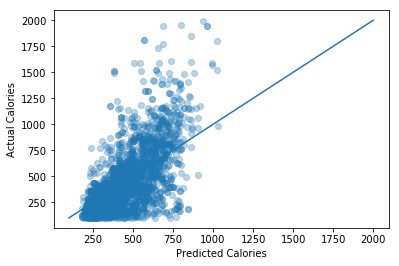

In [17]:
plt.scatter(pred_rf_all, y_test_all, alpha=0.3)
plt.plot(np.linspace(100,2000,1000), np.linspace(100,2000,1000))
plt.xlabel('Predicted Calories')
plt.ylabel('Actual Calories')

In [18]:
np.sqrt(np.mean((pred_rf_all - y_test_all)**2))

236.87484978102853

In [19]:
r2_score(y_test_all, pred_rf_all)

0.41688913697862384

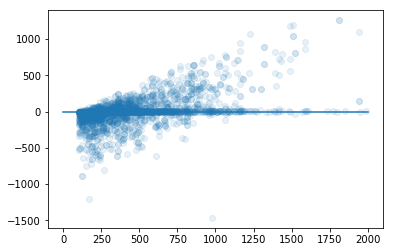

In [43]:
plt.scatter(y_test_all,y_test_all-pred_gb_all,alpha=.1)
plt.plot(np.linspace(0,2000,1000),np.linspace(0,0,1000))

In [45]:
(np.mean(np.abs(pred_gb_all - y_test_all)))

113.0139985364116

In [ ]:
# Gradient Boosted Regressor

In [20]:
gbmodel_all = GradientBoostingRegressor(n_estimators=5000, loss='huber', max_depth=5, max_features=70)
gbmodel_all.fit(X_train_all, y_train_all)

pred_gb_all = gbmodel_all.predict(X_test_all)

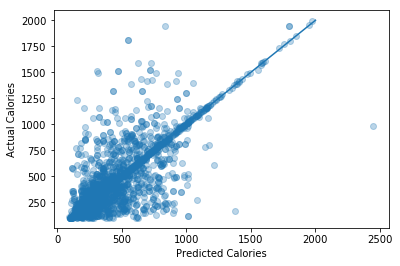

In [21]:
plt.scatter(pred_gb_all, y_test_all, alpha=0.3)
plt.plot(np.linspace(100,2000,1000), np.linspace(100,2000,1000))
plt.xlabel('Predicted Calories')
plt.ylabel('Actual Calories')

In [25]:
np.sqrt(np.mean((pred_gb_all - y_test_all)**2))

204.52143894114411

In [24]:
r2_score(y_test_all, pred_gb_all)

0.56529873142501985

In [26]:
!wget http://23209-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/11/IMG_8700edit.jpg

--2017-09-20 16:19:05--  http://23209-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/11/IMG_8700edit.jpg
Resolving 23209-presscdn.pagely.netdna-cdn.com (23209-presscdn.pagely.netdna-cdn.com)... 94.31.29.32
Connecting to 23209-presscdn.pagely.netdna-cdn.com (23209-presscdn.pagely.netdna-cdn.com)|94.31.29.32|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191751 (187K) [image/jpeg]
Saving to: ‘IMG_8700edit.jpg’

IMG_8700edit.jpg    100%[===================>] 187.26K  --.-KB/s    in 0.01s   

2017-09-20 16:19:05 (16.6 MB/s) - ‘IMG_8700edit.jpg’ saved [191751/191751]



In [30]:
!wget https://static.olocdn.net/menu/chilis/ef0ee5c32a158cb529bc068e8993fb89.jpg

--2017-09-20 16:21:28--  https://static.olocdn.net/menu/chilis/ef0ee5c32a158cb529bc068e8993fb89.jpg
Resolving static.olocdn.net (static.olocdn.net)... 108.161.187.27
Connecting to static.olocdn.net (static.olocdn.net)|108.161.187.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49012 (48K) [image/jpeg]
Saving to: ‘ef0ee5c32a158cb529bc068e8993fb89.jpg’

ef0ee5c32a158cb529b 100%[===================>]  47.86K  --.-KB/s    in 0.005s  

2017-09-20 16:21:28 (9.91 MB/s) - ‘ef0ee5c32a158cb529bc068e8993fb89.jpg’ saved [49012/49012]



In [34]:
!wget https://i.pinimg.com/736x/ea/fc/dc/eafcdc5c123dae4161138135f0103baa--new-england-style-clam-chowder-recipes.jpg

--2017-09-20 16:26:06--  https://i.pinimg.com/736x/ea/fc/dc/eafcdc5c123dae4161138135f0103baa--new-england-style-clam-chowder-recipes.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.40.84, 2a04:4e42:2d::84
Connecting to i.pinimg.com (i.pinimg.com)|151.101.40.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75837 (74K) [image/jpeg]
Saving to: ‘eafcdc5c123dae4161138135f0103baa--new-england-style-clam-chowder-recipes.jpg’

eafcdc5c123dae41611 100%[===================>]  74.06K  --.-KB/s    in 0.007s  

2017-09-20 16:26:06 (10.3 MB/s) - ‘eafcdc5c123dae4161138135f0103baa--new-england-style-clam-chowder-recipes.jpg’ saved [75837/75837]



In [35]:
test_pic = 'eafcdc5c123dae4161138135f0103baa--new-england-style-clam-chowder-recipes.jpg'

test_img = load_img(test_pic, target_size=(224, 224))
y = img_to_array(test_img)
y = np.expand_dims(y, axis=0)
y = y / 255.0
    
features_of_image = model_practice.predict(y)

In [39]:
# Chili's Clam Chowder Bowl

pred_calories = gbmodel_all.predict(features_of_image)
pred_calories

array([ 412.08730621])

In [29]:
# Chili's Cajun Pasta with Grilled Chicken

pred_calories = gbmodel_all.predict(features_of_image)
pred_calories

array([ 545.51909196])

In [33]:
# Chili's Cheesecake

pred_calories = gbmodel_all.predict(features_of_image)
pred_calories

array([ 494.66845593])

In [ ]:
foodfeatures_df = pd.DataFrame.from_dict(names_and_pics)

In [ ]:
foodfeatures_df = foodfeatures_df.T

In [ ]:
calorie_list = []
num_list = ['0','1','2','3','4','5','6','7','8','9']
underscore = '_'
for name in foodfeatures_df.index.values:
#    print (name)
    if name[0] in num_list:
        calorie_list.append(int(name[0:name.index('_')]))
    else:
        underscores = [pos for pos, char in enumerate(name) if char == underscore]
        print (underscores)
        calorie_list.append(int(name[underscores[0]+1:underscores[1]]))
#        calorie_list.append(int(name[name.index('_')+1:name.index('_')]))

In [ ]:
foodfeatures_df['Calories'] = pd.Series(calorie_list).values

In [ ]:
foodfeatures_df.tail()

In [ ]:
foodfeatures_df.shape

In [ ]:
# foodfeatures_df = foodfeatures_df.drop_duplicates([i for i in range(0,256)],keep='last')

In [ ]:
limited_foodfeatures_df.shape

In [ ]:
limited_foodfeatures_df = foodfeatures_df[foodfeatures_df['Calories'] >= 100]

In [ ]:
features = limited_foodfeatures_df.iloc[:,:-1]
target_cal = limited_foodfeatures_df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target_cal, test_size = 0.3, random_state = 42)

In [ ]:
# Random Forest Regressor

In [ ]:
rfmodel = RandomForestRegressor(n_estimators = 5000, min_samples_leaf=15, max_features=20, n_jobs=-1)
rfmodel.fit(X_train, y_train)

pred_rf = rfmodel.predict(X_test)

In [ ]:
plt.scatter(pred_rf, y_test, alpha=0.3)
plt.plot(np.linspace(0,2000,1000), np.linspace(0,2000,1000))
plt.xlabel('Predicted Calories')
plt.ylabel('Actual Calories')
plt.ylim(2000)

In [ ]:
np.sqrt(np.mean((pred_rf - y_test)**2))

In [ ]:
r2_score(y_test, pred_rf)

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/9/9a/Big_Mac_hamburger.jpg

In [ ]:
!wget https://static1.squarespace.com/static/58805174f5e231028eb37136/t/58cb717c20099ef564bad9a2/1489727888636/homepage-burger.jpg?format=2500w

In [ ]:
!wget http://popeyeschicken.ca//images/food/mississippi-mud-cake.jpg

In [ ]:
!wget https://s3-media4.fl.yelpcdn.com/bphoto/peBhBlj03ZbWdVrGaZ9GZg/o.jpg

In [ ]:
test_pic = 'o.jpg'

test_img = load_img(test_pic, target_size=(224, 224))
y = img_to_array(test_img)
y = np.expand_dims(y, axis=0)
y = y / 255.0
    
features_of_image = model_practice.predict(y)

In [ ]:
# Popeyes Mud Cake

pred_calories_cake2 = rfmodel_all.predict(features_of_image)
pred_calories_cake2

In [ ]:
# Popeyes Mud cake

pred_calories_cake = rfmodel_all.predict(features_of_image)
pred_calories_cake

In [ ]:
# Big Mac: Actual 530 cal

pred_calories = gbmodel_all.predict(features_of_image)
pred_calories

In [ ]:
pred_calories_2 = rfmodel.predict(features_of_image)
pred_calories_2

In [ ]:
# LINEAR REGRESSION MODEL

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

In [ ]:
lr_model.coef_, lr_model.intercept_

In [ ]:
test_set_pred = lr_model.predict(X_test)

In [ ]:
plt.scatter(test_set_pred,y_test,alpha=.5)
plt.plot(np.linspace(0,1000,1000),np.linspace(0,1400,1000))

In [ ]:
np.sqrt(np.mean((test_set_pred - y_test)**2))

In [ ]:
r2_score(y_test, test_set_pred)

In [ ]:
# LASSO MODEL 

In [ ]:
lasso_model = Lasso(alpha = 10)
lasso_model.fit(X_train, y_train)

In [ ]:
test_pred_lasso = lasso_model.predict(X_test)

In [ ]:
plt.scatter(test_pred_lasso,y_test,alpha=.4)
plt.plot(np.linspace(-0.5,2,1000),np.linspace(-0.5,5,1000))

In [ ]:
r2_score(y_test, test_pred_lasso)

In [ ]:
# CROSS-VALIDATION LINEAR REGRESION MODEL

In [ ]:
alphavec = 10**np.linspace(-3,9,27)
alphavec

In [ ]:
lr_model_cv = LassoCV(alphas = alphavec, cv=5)
lr_model_cv.fit(X_train, y_train)

In [ ]:
test_set_pred_cv = lr_model_cv.predict(X_test)

In [ ]:
r2_score(y_test, test_set_pred_cv)

In [ ]:
# 